# AUTOMATIC EDA

In [11]:
# -------------------------------
# IMPORTS
# -------------------------------

# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

# Models optimization
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

# Metrics for CLASSIFICATION models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Metrics for REGRESSION models
from sklearn.metrics import mean_squared_error, r2_score

# Selection boxes: ipywidgets as widgets
import ipywidgets as widgets
from IPython.display import display


In [12]:
# -------------------------------
# INPUTS
# -------------------------------

# INPUT BOXES
font_size = "12px"   # Global font size
cell_width = "100px" # Width for all cells
cell_height = "30px" # Height for all cells
max_table_width = "90000px"  # Width of visible table area before horizontal scroll

# PATHS
data_separator = ";"
input_path = "/workspaces/logistic-regression-project/data/raw/bank-marketing-campaign-data.csv"
output_path = "../data/processed/"

# AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
var_type_proposal_threshold = 0.01 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC

# PLOTS FOR VARIABLE ANALYSIS
make_plots = True
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)

# NOISY ATTRIBUTES (HIGHLY CORRELATED)
corr_threshold = 0.9  # Correlation level considered as "too high"

# OUTLIERS
low_outliers_threshold = 1.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 3.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "EXTREME OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

# MISSING VALUES
th_fill = 5.0   # [%] If missing perc > th_fill → fill by grouped median, otherwise drop rows

# SPLIT
my_test_size = 0.2
random_seed = 42

# FEATURE SELECTION
feature_keeping_threshold = 100 # [%] Percentaje of features to keep (SelectKBest) 

In [30]:
# -------------------------------
# STEP 0) LOAD RAW DATAFRAME
# -------------------------------
print("STEP 0) LOAD RAW DATAFRAME")

# Read DataFrame
df_raw=pd.read_csv(input_path, sep = data_separator)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 1) EXPLORE DATAFRAME
# -------------------------------
print("STEP 1) EXPLORE DATAFRAME")

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S1.info())

# Count attributes
df_S1_summary = pd.DataFrame({
    "Column": df_S1.columns,
    "Unique_Count": df_S1.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S1_summary)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 2) REMOVE DUPLICATES
# -------------------------------
print("STEP 2) REMOVE DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")
    print("- ℹ️ These are the dropped duplicates:")
    display(df_S2_duplicates)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 3) SELECT RELEVANT ATTRIBUTES
# -------------------------------
print("STEP 3) SELECT RELEVANT ATTRIBUTES")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# List of columns
columns = df_S3.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=f"col_{i}",
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DROP/KEEP ROW
# -------------------------------
keep_col_drop_down_cells = [widgets.Label(value="Keep col.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
keep_col = []
for i in range(len(columns)):
    drop = widgets.Dropdown(
        options=[True, False],
        value=True,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    keep_col_drop_down_cells.append(drop)
    keep_col.append(drop)
drop_row = widgets.HBox(keep_col_drop_down_cells)

# -------------------------------
# COL NAME ROW
# -------------------------------
col_name_cells = [widgets.Label(value="Col. name", layout=widgets.Layout(width=cell_width, height=cell_height))]
col_name = []
for i in range(len(columns)):
    text = widgets.Text(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    text.style = {'font_size': font_size}
    col_name.append(text)
    col_name_cells.append(text)
name_row = widgets.HBox(col_name_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, drop_row, name_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

STEP 0) LOAD RAW DATAFRAME
--------------------------------------------------------------
--------------------------------------------------------------

STEP 1) EXPLORE DATAFRAME
- ℹ️ Shape of the original DataFrame: (41188, 21)
- ℹ️ Content of the original DataFrame:


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.pric

None

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0              age            78
1              job            12
2          marital             4
3        education             8
4          default             3
5          housing             3
6             loan             3
7          contact             2
8            month            10
9      day_of_week             5
10        duration          1544
11        campaign            42
12           pdays            27
13        previous             8
14        poutcome             3
15    emp.var.rate            10
16  cons.price.idx            26
17   cons.conf.idx            26
18       euribor3m           316
19     nr.employed            11
20               y             2

--------------------------------------------------------------
--------------------------------------------------------------

STEP 2) REMOVE DUPLICATES
- ⚠️ Original DataFrame contained 12 duplicates that have been dropped

- ℹ️ These are the dropped duplicates:


age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1266   telephone   may         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32516   cellular   may         fri  ...         4    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.1          93.994          -36.4      4.855   
12261  nonexistent          1.4          93.918          -42.7      4.966   
14234  nonexistent          1.4          93.918          -42.7      4.962   
16956  nonexistent          1.4          93.918          -42.7      4.962   
18465  nonexistent          1.4          93.918          -42.7      4.968   
20216  nonexistent          1.4          93.444          -36.1      4.965   
20534  nonexistent          1.4          93.444          -36.1      4.966   
25217  nonexistent         -0.1          93.200          -42.0      4.153   
28477  nonexistent         -1.8          93.075          -47.1      1.423   
32516  nonexistent         -1.8          92.893          -46.2      1.313   
36951  nonexistent         -2.9          92.469          -33.6      1.072   
38281  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1266        5191.0   no  
12261       5228.1   no  
14234       5228.1   no  
16956       5228.1   no  
18465       5228.1   no  
20216       5228.1   no  
20534       5228.1   no  
25217       5195.8   no  
28477       5099.1   no  
32516       5099.1   no  
36951       5076.2  yes  
38281       5017.5   no  

[12 rows x 21 columns]

--------------------------------------------------------------
--------------------------------------------------------------

STEP 3) SELECT RELEVANT ATTRIBUTES


In [31]:
# Validate box inputs
for i in range(len(keep_col)):
    if  keep_col[i].value not in [True, False]:
        raise ValueError("- ❌ Missing Keep/Drop selection in column " + str(i))

for i in range(len(col_name)):
    if col_name[i].value.strip() == "":
        raise ValueError("- ❌ Empty column name found for column " + str(i))

print("- ✅ All selections and column names have been validated successfully")

# Build KEEP bolean mask and rename dictionary
keep_mask = []
rename_dict = {}
for i in range(len(columns)):
    keep_mask.append(keep_col[i].value)
    rename_dict[columns[i]] = col_name[i].value

# Rename columns
df_S3 = df_S3.rename(columns=rename_dict)
    
# Drop non-relevant columns
df_S3=df_S3.loc[:, keep_mask]

# Print results
print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S2.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S3.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S3.shape}")
display(df_S3.head())

# Count attributes
df_S3_summary = pd.DataFrame({
    "Column": df_S3.columns,
    "Unique_Count": df_S3.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S3_summary)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
# -------------------------------
print("STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# List of columns
columns = df_S4.columns.tolist()

# ---------------------------------------
# AUTO-DETECTION OF NUMERIC / CATEGORY
# ---------------------------------------
category_var_auto = []
numeric_var_auto = []
for col in df_S4.columns:
    col_data = df_S4[col].dropna()
    total_rows = len(df_S4)
    if total_rows == 0:
        continue
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S4[col].dtype)

    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    if col_dtype.startswith("int") or col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)

print("- ℹ️ Proposed CATEGORY Attributes:", category_var_auto)
print("- ℹ️ Proposed NUMERIC Attributes:", numeric_var_auto)

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for name in columns:
    header = widgets.Label(value=name, layout=widgets.Layout(width=cell_width, height=cell_height))
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DATA TYPE ROW
# -------------------------------
data_type_drop_down_cells = [widgets.Label(value="Data type:", layout=widgets.Layout(width=cell_width, height=cell_height))]
data_type = []
for col in columns:
    data_type_value = "CATEGORY" if col in category_var_auto else "NUMERIC"
    drop = widgets.Dropdown(
        options=["CATEGORY", "NUMERIC"],
        value=data_type_value,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    data_type.append(drop)
    data_type_drop_down_cells.append(drop)
data_type_row = widgets.HBox(data_type_drop_down_cells)

# -------------------------------
# TARGET ATTRIBUTE ROW
# -------------------------------
target_var_drop_down_cells = [widgets.Label(value="Is the target var.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
target_var = []
for _ in columns:
    drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    target_var.append(drop)
    target_var_drop_down_cells.append(drop)
target_var_row = widgets.HBox(target_var_drop_down_cells)

# -------------------------------
# COMBINATION ATTRIBUTE ROW
# -------------------------------
combi_var_drop_down_cells = [widgets.Label(value="Combination att.", layout=widgets.Layout(width=cell_width, height=cell_height))]
combi_var = []
for col in columns:
    if col in category_var_auto:
        drop = widgets.Dropdown(
            options=[True, False],
            value=False,
            layout=widgets.Layout(width=cell_width, height=cell_height),
            style={'description_width': '0px'}
        )
    else:
        drop = widgets.Label(value="-", layout=widgets.Layout(width=cell_width, height=cell_height))
    combi_var.append(drop)
    combi_var_drop_down_cells.append(drop)
combi_var_row = widgets.HBox(combi_var_drop_down_cells)

# -------------------------------
# REACTIVE BEHAVIOR
# -------------------------------

def on_data_type_change(change, i):
    """Show dropdown for Combination Attribute only if Data type = CATEGORY"""
    if change['name'] == 'value':
        parent_box = combi_var_drop_down_cells  # full list of widgets in that row
        old_widget = combi_var[i]

        if change['new'] == "CATEGORY":
            # Replace label "-" with dropdown
            new_widget = widgets.Dropdown(
                options=[True, False],
                value=False,
                layout=widgets.Layout(width=cell_width, height=cell_height),
                style={'description_width': '0px'}
            )
            combi_var[i] = new_widget
            parent_box[i+1] = new_widget  # +1 offset because first cell is label header
            new_widget.observe(lambda ch, i=i: on_combi_change(ch, i), names='value')

        else:
            # Replace dropdown with label "-"
            new_widget = widgets.Label(value="-", layout=widgets.Layout(width=cell_width, height=cell_height))
            combi_var[i] = new_widget
            parent_box[i+1] = new_widget  # same offset
        combi_var_row.children = tuple(parent_box)

def on_combi_change(change, i):
    """Ensure only one Combination Attribute = True"""
    if change['name'] == 'value' and change['new'] is True:
        for j, c in enumerate(combi_var):
            if j != i and isinstance(c, widgets.Dropdown):
                c.value = False

def on_target_change(change, i):
    """Ensure only one Target Attribute = True"""
    if change['name'] == 'value':
        if change['new'] is True:
            # 1️⃣ Set others to False
            for j, t in enumerate(target_var):
                if j != i:
                    t.value = False
            # 2️⃣ Highlight current dropdown in green
            target_var[i].style = {'description_width': '0px', 'handle_color': 'green'}
            target_var[i].layout.border = '2px solid limegreen'
            target_var[i].layout.background_color = '#d9fdd3'
        else:
            # 3️⃣ Remove highlight when deselected
            target_var[i].layout.border = 'none'
            target_var[i].layout.background_color = 'transparent'


# Attach observers
for i in range(len(columns)):
    data_type[i].observe(lambda ch, i=i: on_data_type_change(ch, i), names='value')
    if isinstance(combi_var[i], widgets.Dropdown):
        combi_var[i].observe(lambda ch, i=i: on_combi_change(ch, i), names='value')
    target_var[i].observe(lambda ch, i=i: on_target_change(ch, i), names='value')

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
scrollable_box = widgets.VBox([header_row, data_type_row, target_var_row, combi_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)


- ✅ All selections and column names have been validated successfully
- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 21
 - ℹ️ Cleaned df's  columns: 17
 - ℹ️ Final DataFrame shape: (41176, 17)


age        job  marital    education  default housing loan  duration  \
0   56  housemaid  married     basic.4y       no      no   no       261   
1   57   services  married  high.school  unknown      no   no       149   
2   37   services  married  high.school       no     yes   no       226   
3   40     admin.  married     basic.6y       no      no   no       151   
4   56   services  married  high.school       no      no  yes       307   

   campaign  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1         0  nonexistent           1.1          93.994   
1         1         0  nonexistent           1.1          93.994   
2         1         0  nonexistent           1.1          93.994   
3         1         0  nonexistent           1.1          93.994   
4         1         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0              age            78
1              job            12
2          marital             4
3        education             8
4          default             3
5          housing             3
6             loan             3
7         duration          1544
8         campaign            42
9         previous             8
10        poutcome             3
11    emp.var.rate            10
12  cons.price.idx            26
13   cons.conf.idx            26
14       euribor3m           316
15     nr.employed            11
16               y             2

--------------------------------------------------------------
--------------------------------------------------------------

STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
- ℹ️ Proposed CATEGORY Attributes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
- ℹ️ Proposed NUMERIC Attributes: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [32]:
# Validate box inputs
for i in range(len(data_type)):
    if  data_type[i].value not in ["CATEGORY", "NUMERIC"]:
        raise ValueError("- ❌ Missing Data Type selection in column " + columns[i])
print("- ✅ All Data Type selections validated successfully")

for i in range(len(target_var)):
    if  target_var[i].value not in [True, False]:
        raise ValueError("- ❌ Missing target attribute selection in column " + str(i))
    
target_var_true_count = 0    
for i in range(len(target_var)):
    if target_var[i].value == True:
        target_var_true_count += 1
if target_var_true_count == 0:
    raise ValueError("❌ You must select exactly one target attribute (none selected)")
if target_var_true_count > 1:
    raise ValueError("❌ You must select exactly one target attribute (selected " + str(target_var_true_count) + ")")
print("- ✅ Target variable selections validated successfully")

combi_var_true_count = 0    
for i in range(len(combi_var)):
    if combi_var[i].value == True:
        combi_var_true_count += 1
        if data_type[i].value == "NUMERIC":
            raise ValueError("❌ Combination attribute for multivariant analysis must be a CATEGORY attribute!")
if combi_var_true_count == 0 and make_plots:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (none selected)")
if combi_var_true_count > 1 and make_plots:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (selected " + str(combi_var_true_count) + ")")
if make_plots:
    print("- ✅ Combination attribute validated successfully")
else:
    print("- ℹ️ Combination not needed because plots are not drawn")

# Store target attribute
for i in range(len(target_var)):
    if target_var[i].value == True:
        y_var = columns[i]
        
# Store Attributes by Data Type
category_var = []
numeric_var = []
for i in range(len(columns)):
    if data_type[i].value == "CATEGORY":
        category_var.append(columns[i])
    else:
        numeric_var.append(columns[i])

# Checking if y_var is binary or multiclass
if y_var in category_var:
    y_var_unique_values = df_S4[y_var].unique()
    if len(y_var_unique_values) == 2:
        is_y_var_binary = True
    else:
        is_y_var_binary = False

# Print results
print("- ℹ️ Confirmed CATEGORY Attributes: " + str(category_var))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_var))
print("- ℹ️ Confirmed target Attribute: " + y_var)
if is_y_var_binary:
    print("- ℹ️ Target Attribute - " + y_var + " is BINARY")
else:
    print("- ℹ️ Target Attribute - " + y_var + " is MULTICLASS")

# Store combination attribute
for i in range(len(columns)):
    if combi_var[i].value == True and data_type[i].value == "CATEGORY":
        cat_var_comb = columns[i]
# Print confirmed Data Types
if make_plots:
    print("- ℹ️ Confirmed combination attribute: " + cat_var_comb)

- ✅ All Data Type selections validated successfully
- ✅ Target variable selections validated successfully
- ✅ Combination attribute validated successfully
- ℹ️ Confirmed CATEGORY Attributes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
- ℹ️ Confirmed NUMERIC Attributes: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
- ℹ️ Confirmed target Attribute: y
- ℹ️ Target Attribute - y is BINARY
- ℹ️ Confirmed combination attribute: education


STEP 5 - UNIVARIABLE ANALYSIS

 🏷️ CATEGORY VARIABLES


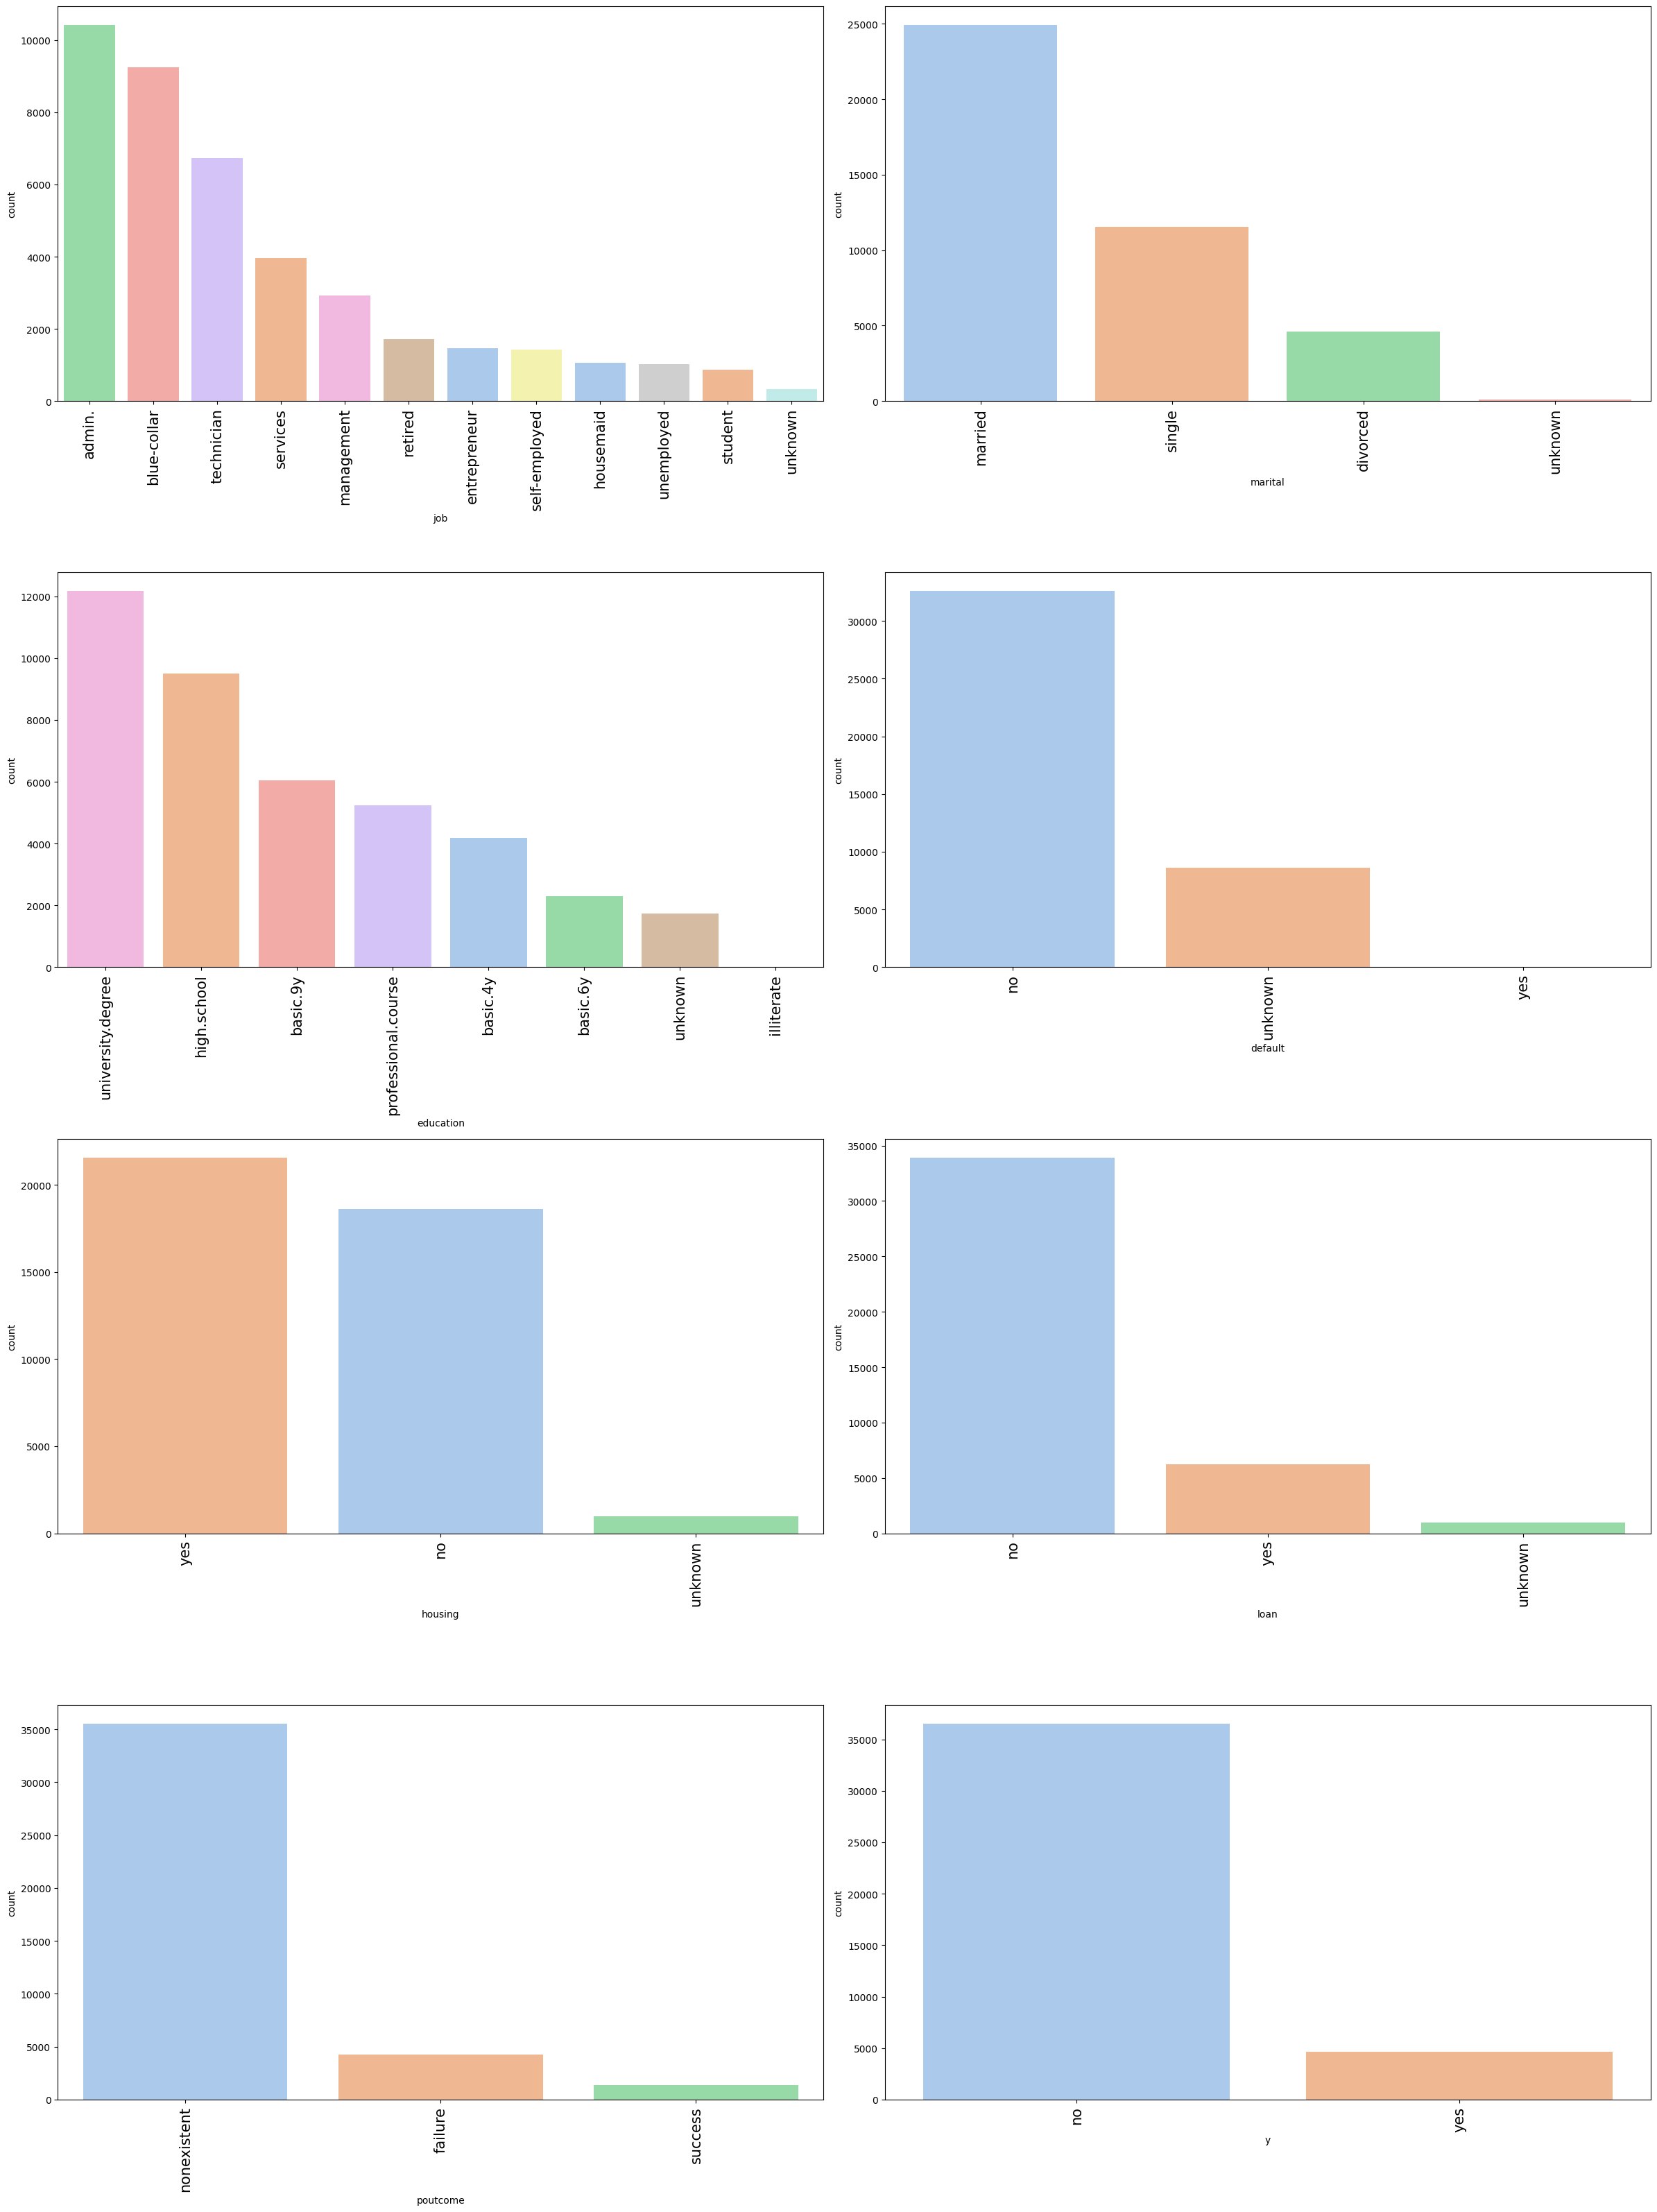


 🔢 NUMERIC VARIABLES


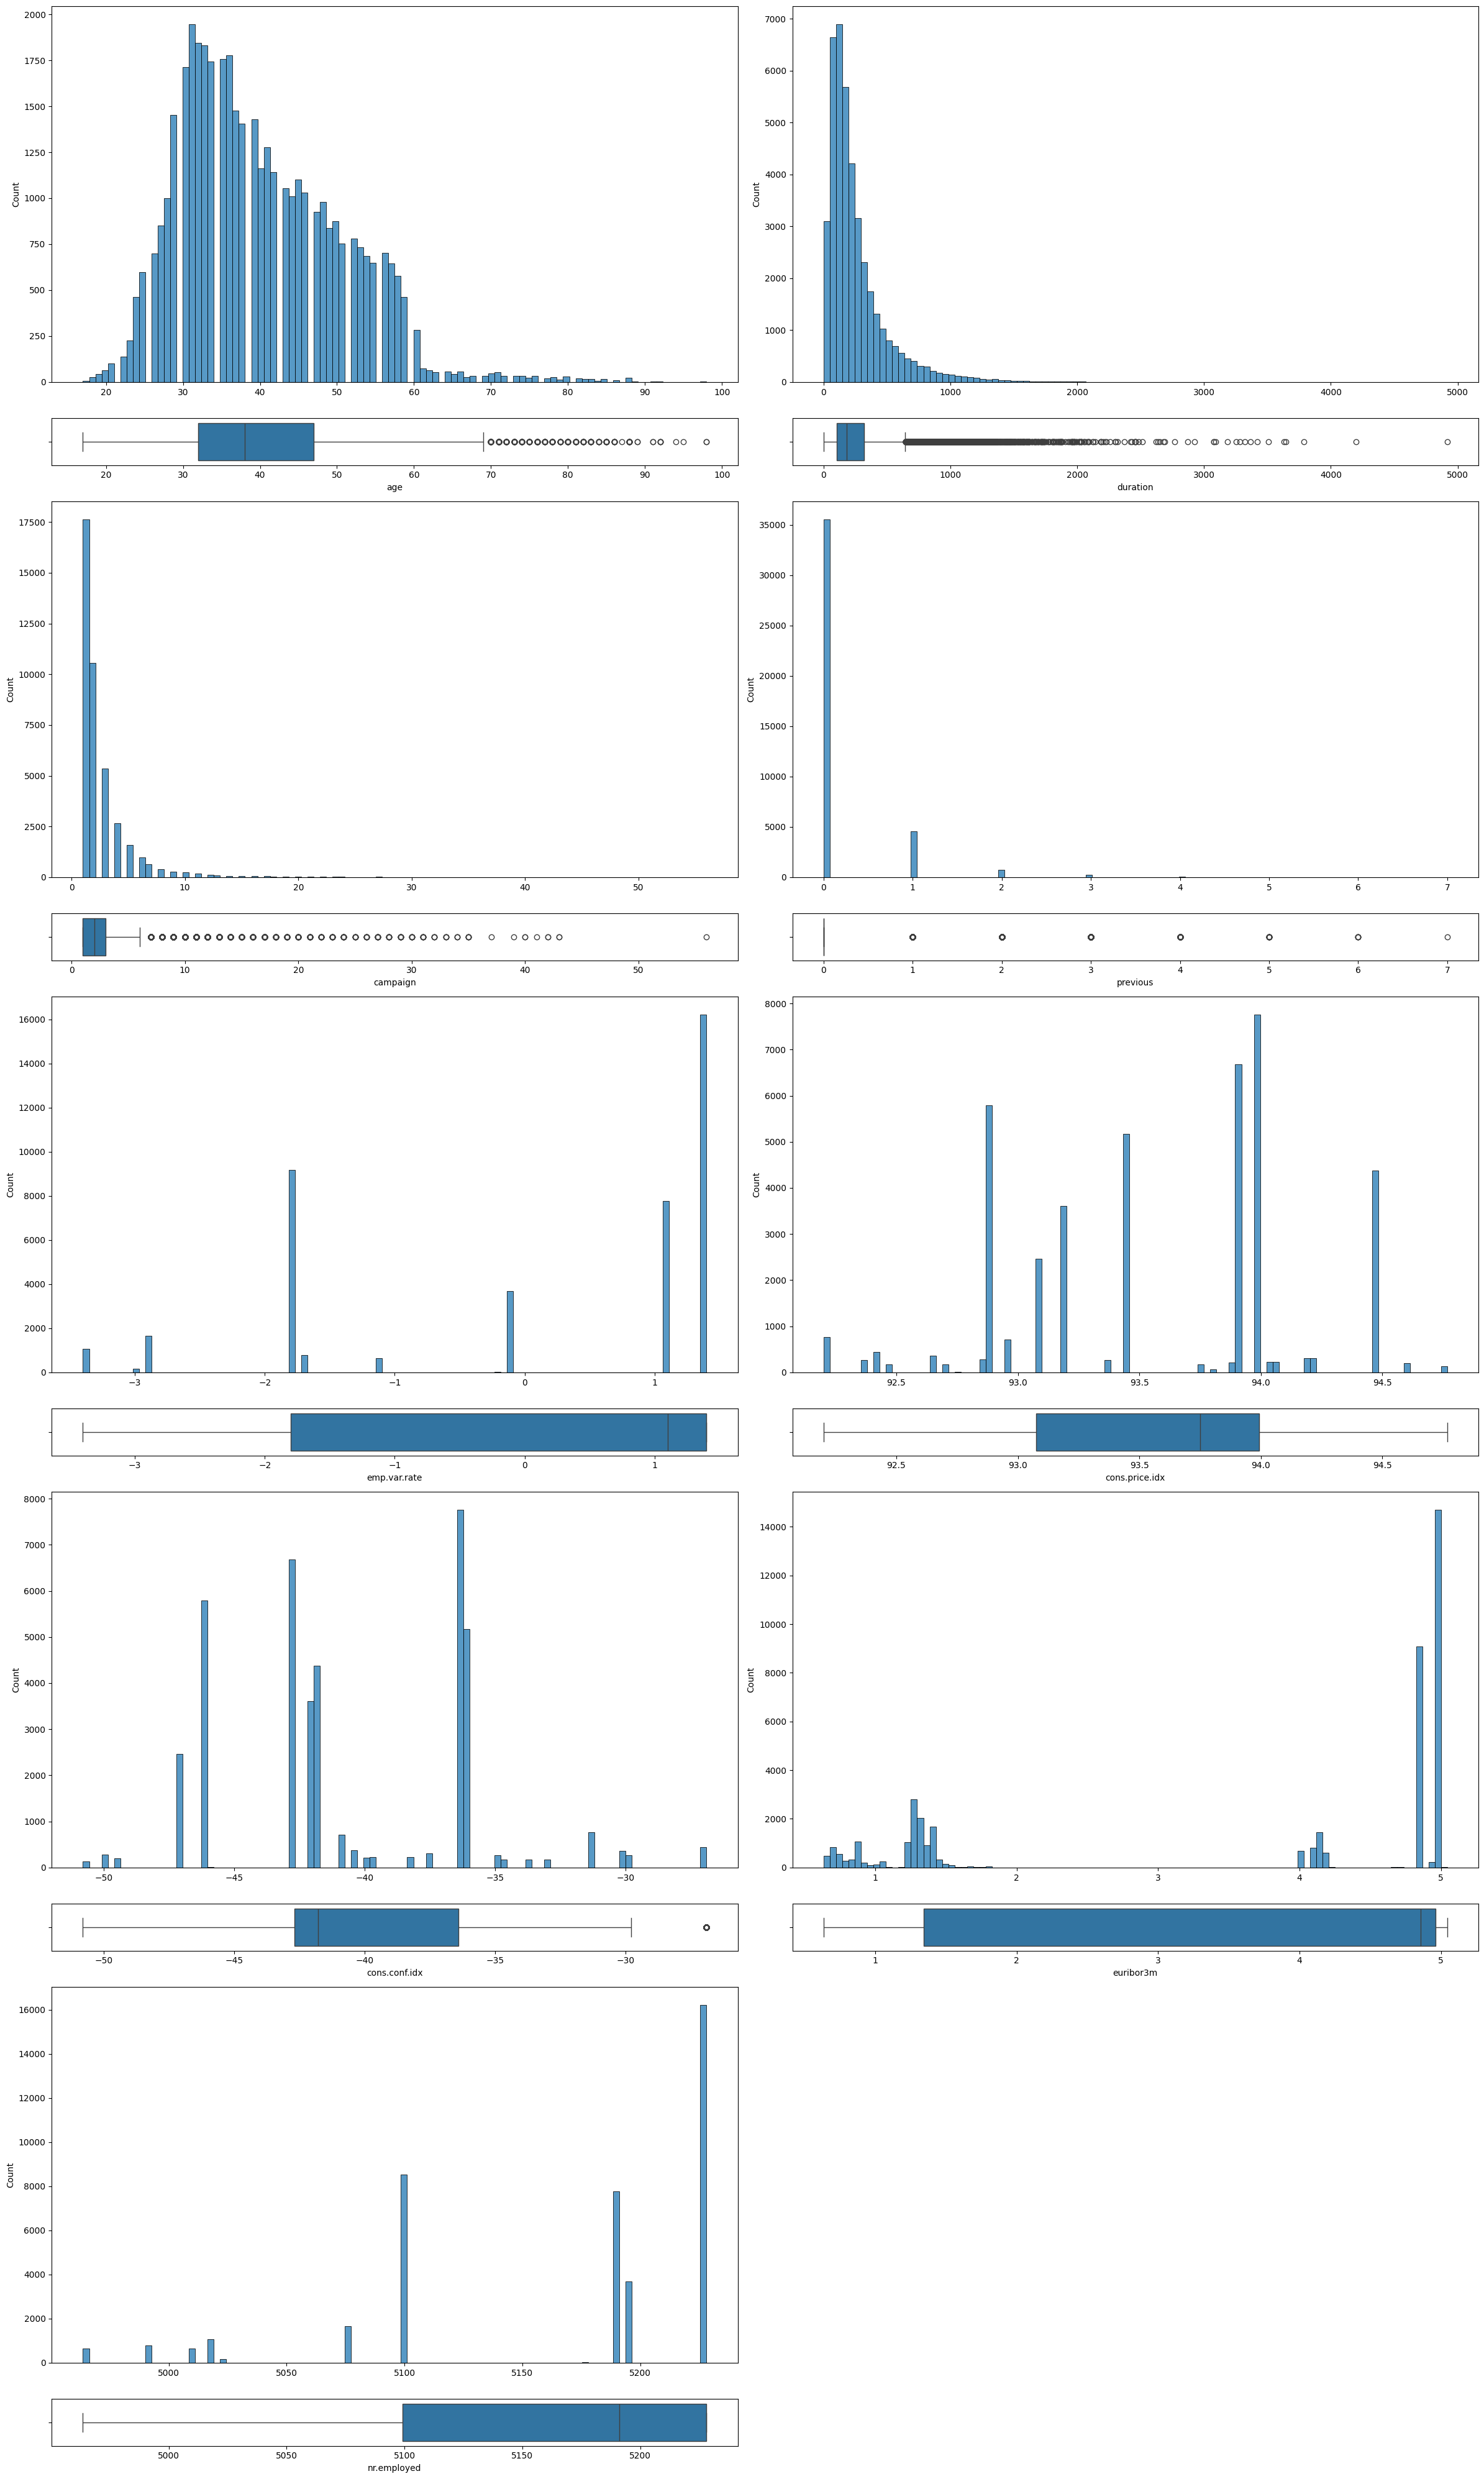

--------------------------------------------------------------
--------------------------------------------------------------

STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET

 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target
   This type of plot is non applicable for this case, because the target variable is CATEGORIC

 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target
   This type of plot is non applicable for this case, because the target variable is CATEGORIC

 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target


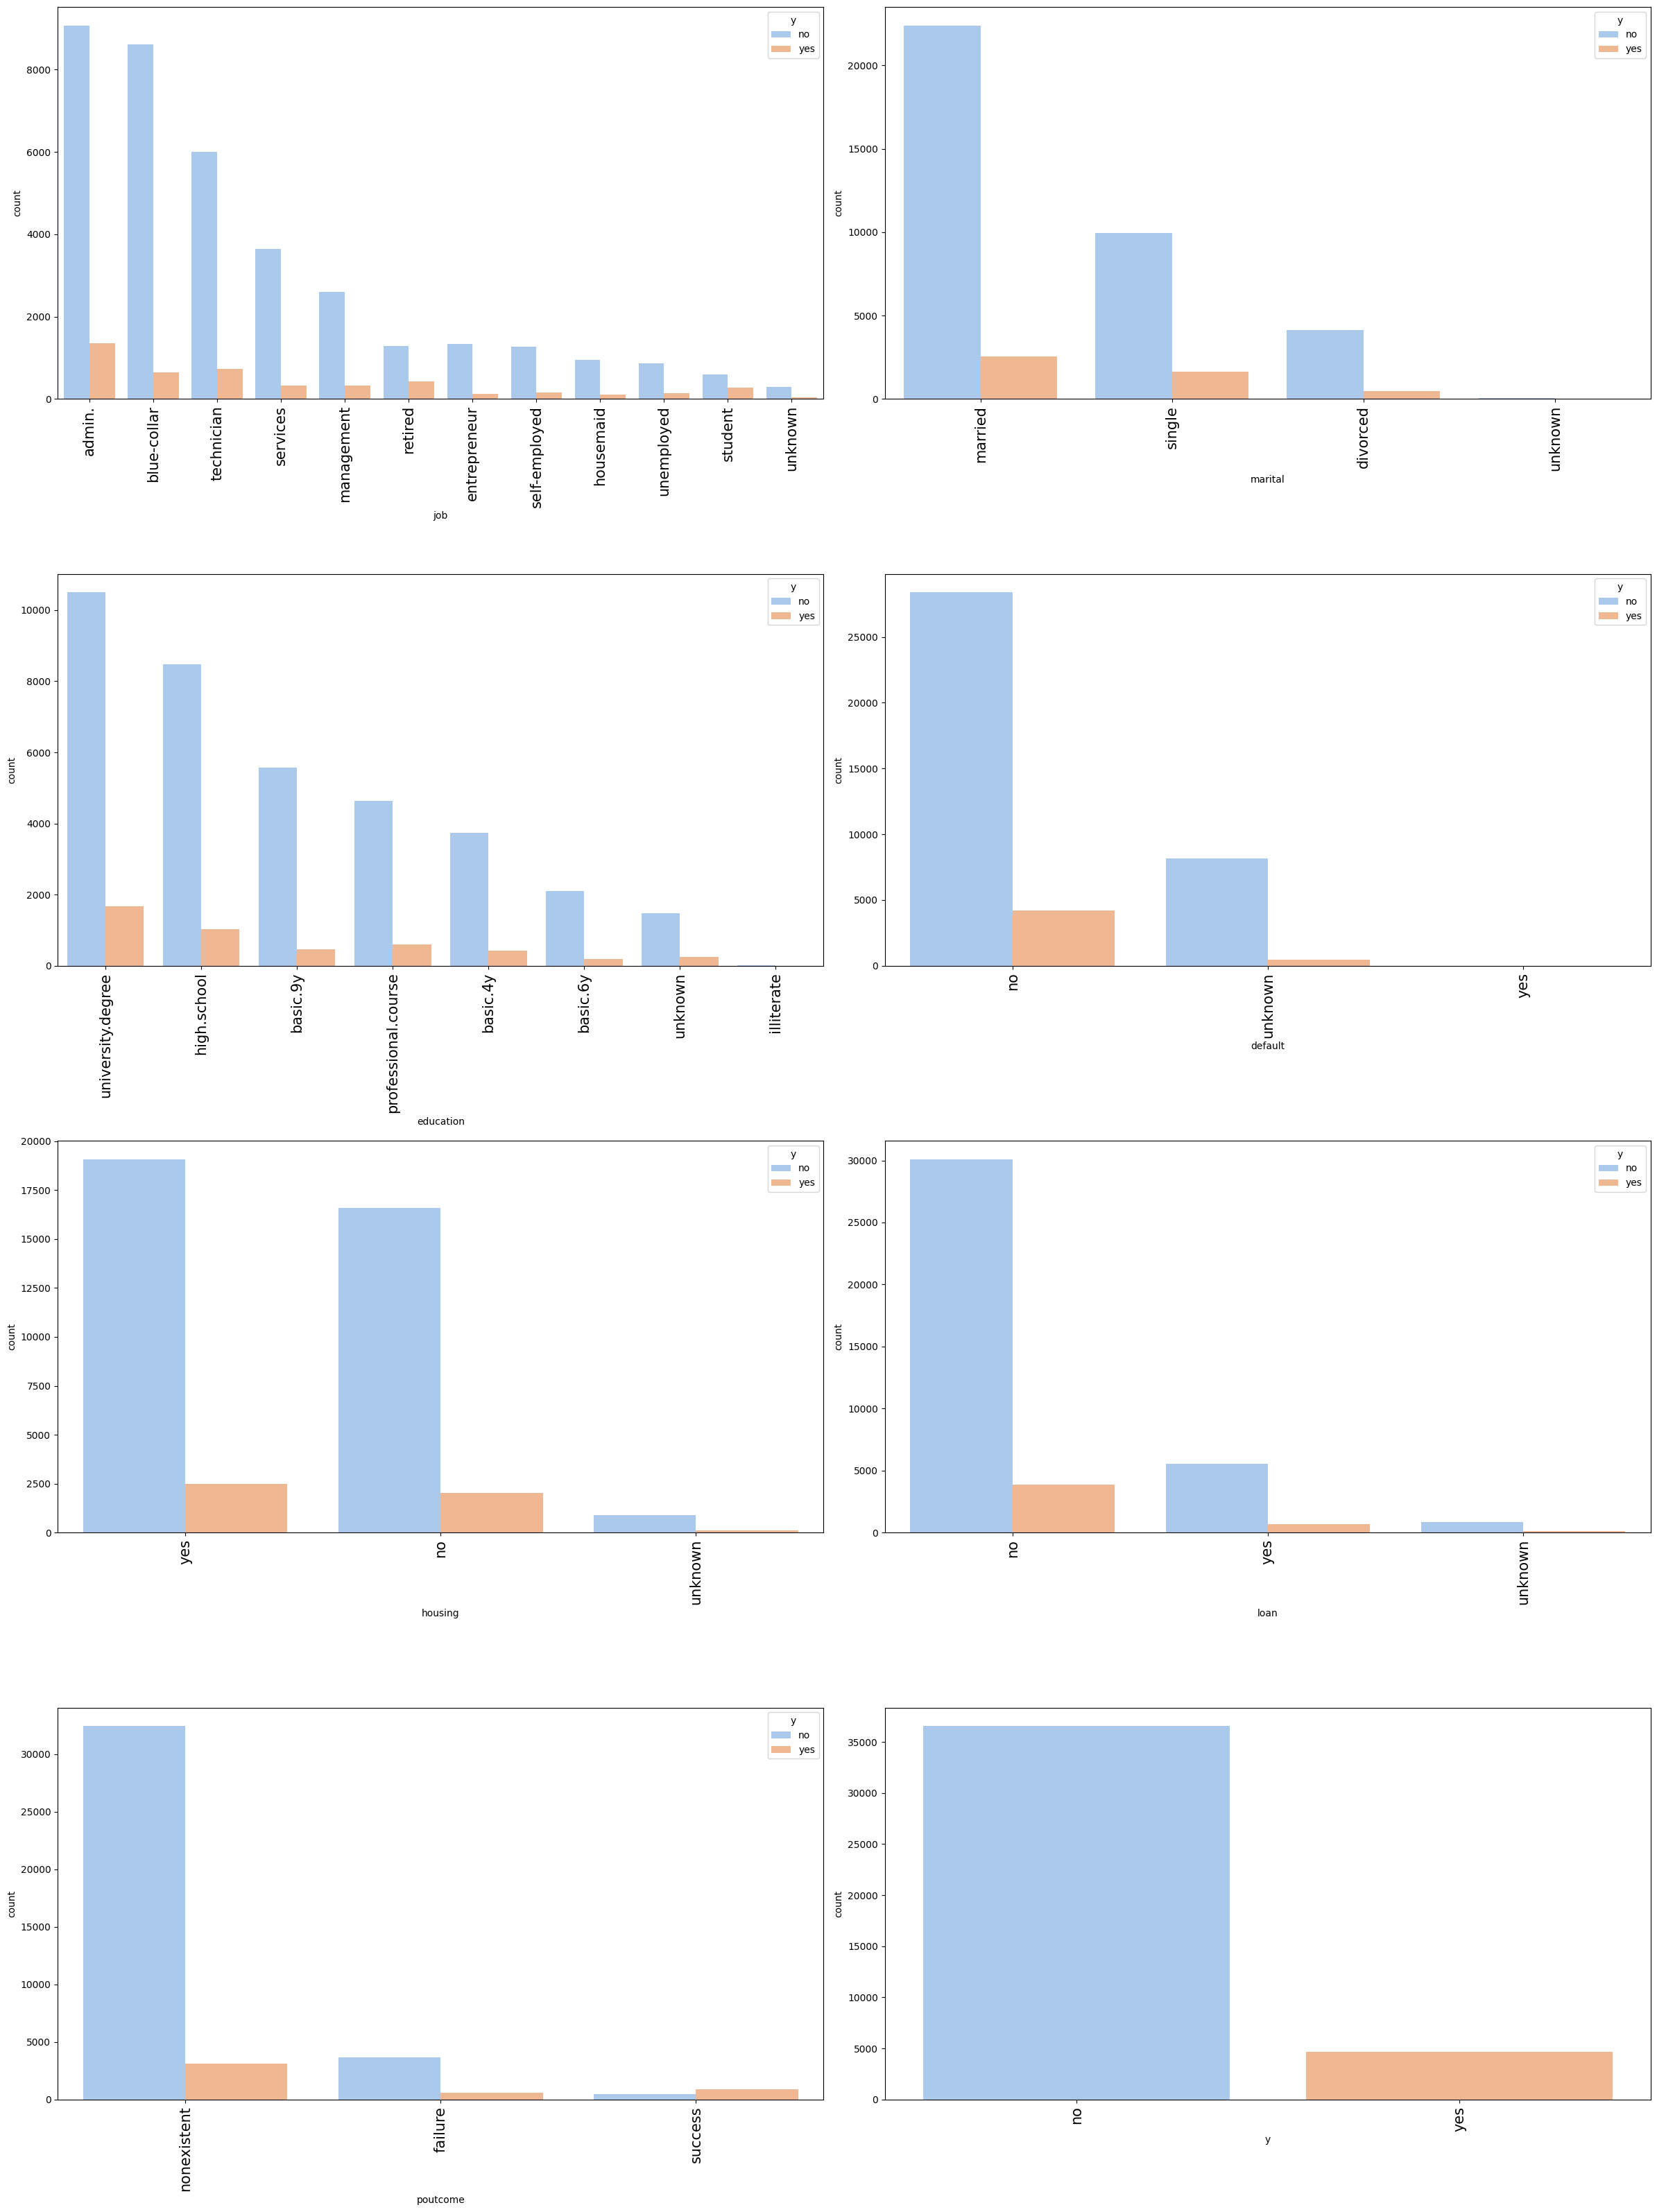

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7 - MULTIVARIANT ANALYSIS - ALL VS ALL

 🔢 NUMERIC VS 🔢 NUMERIC



 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes


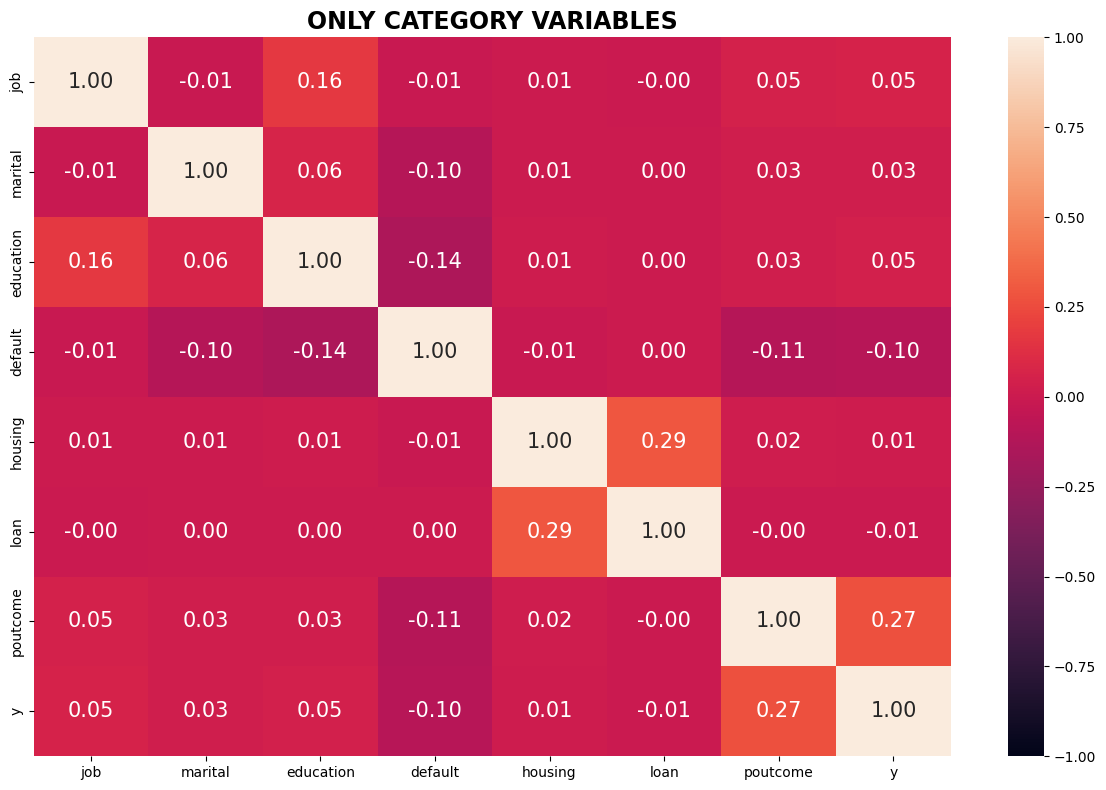

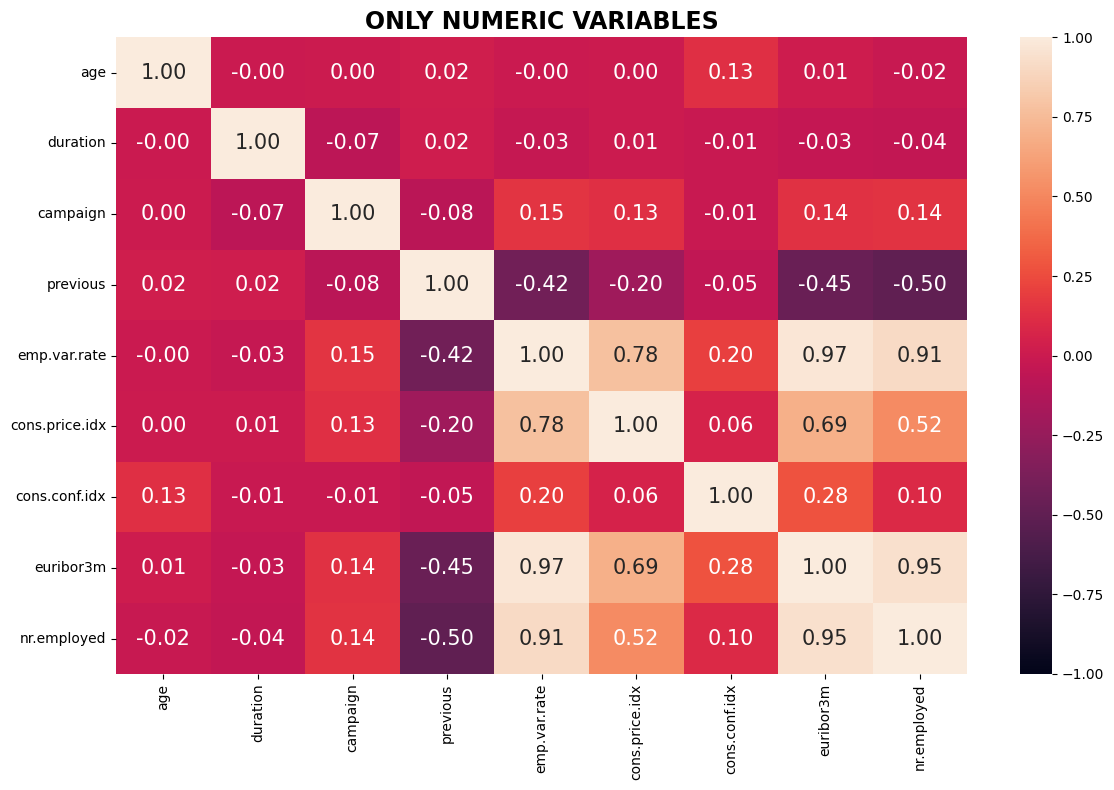

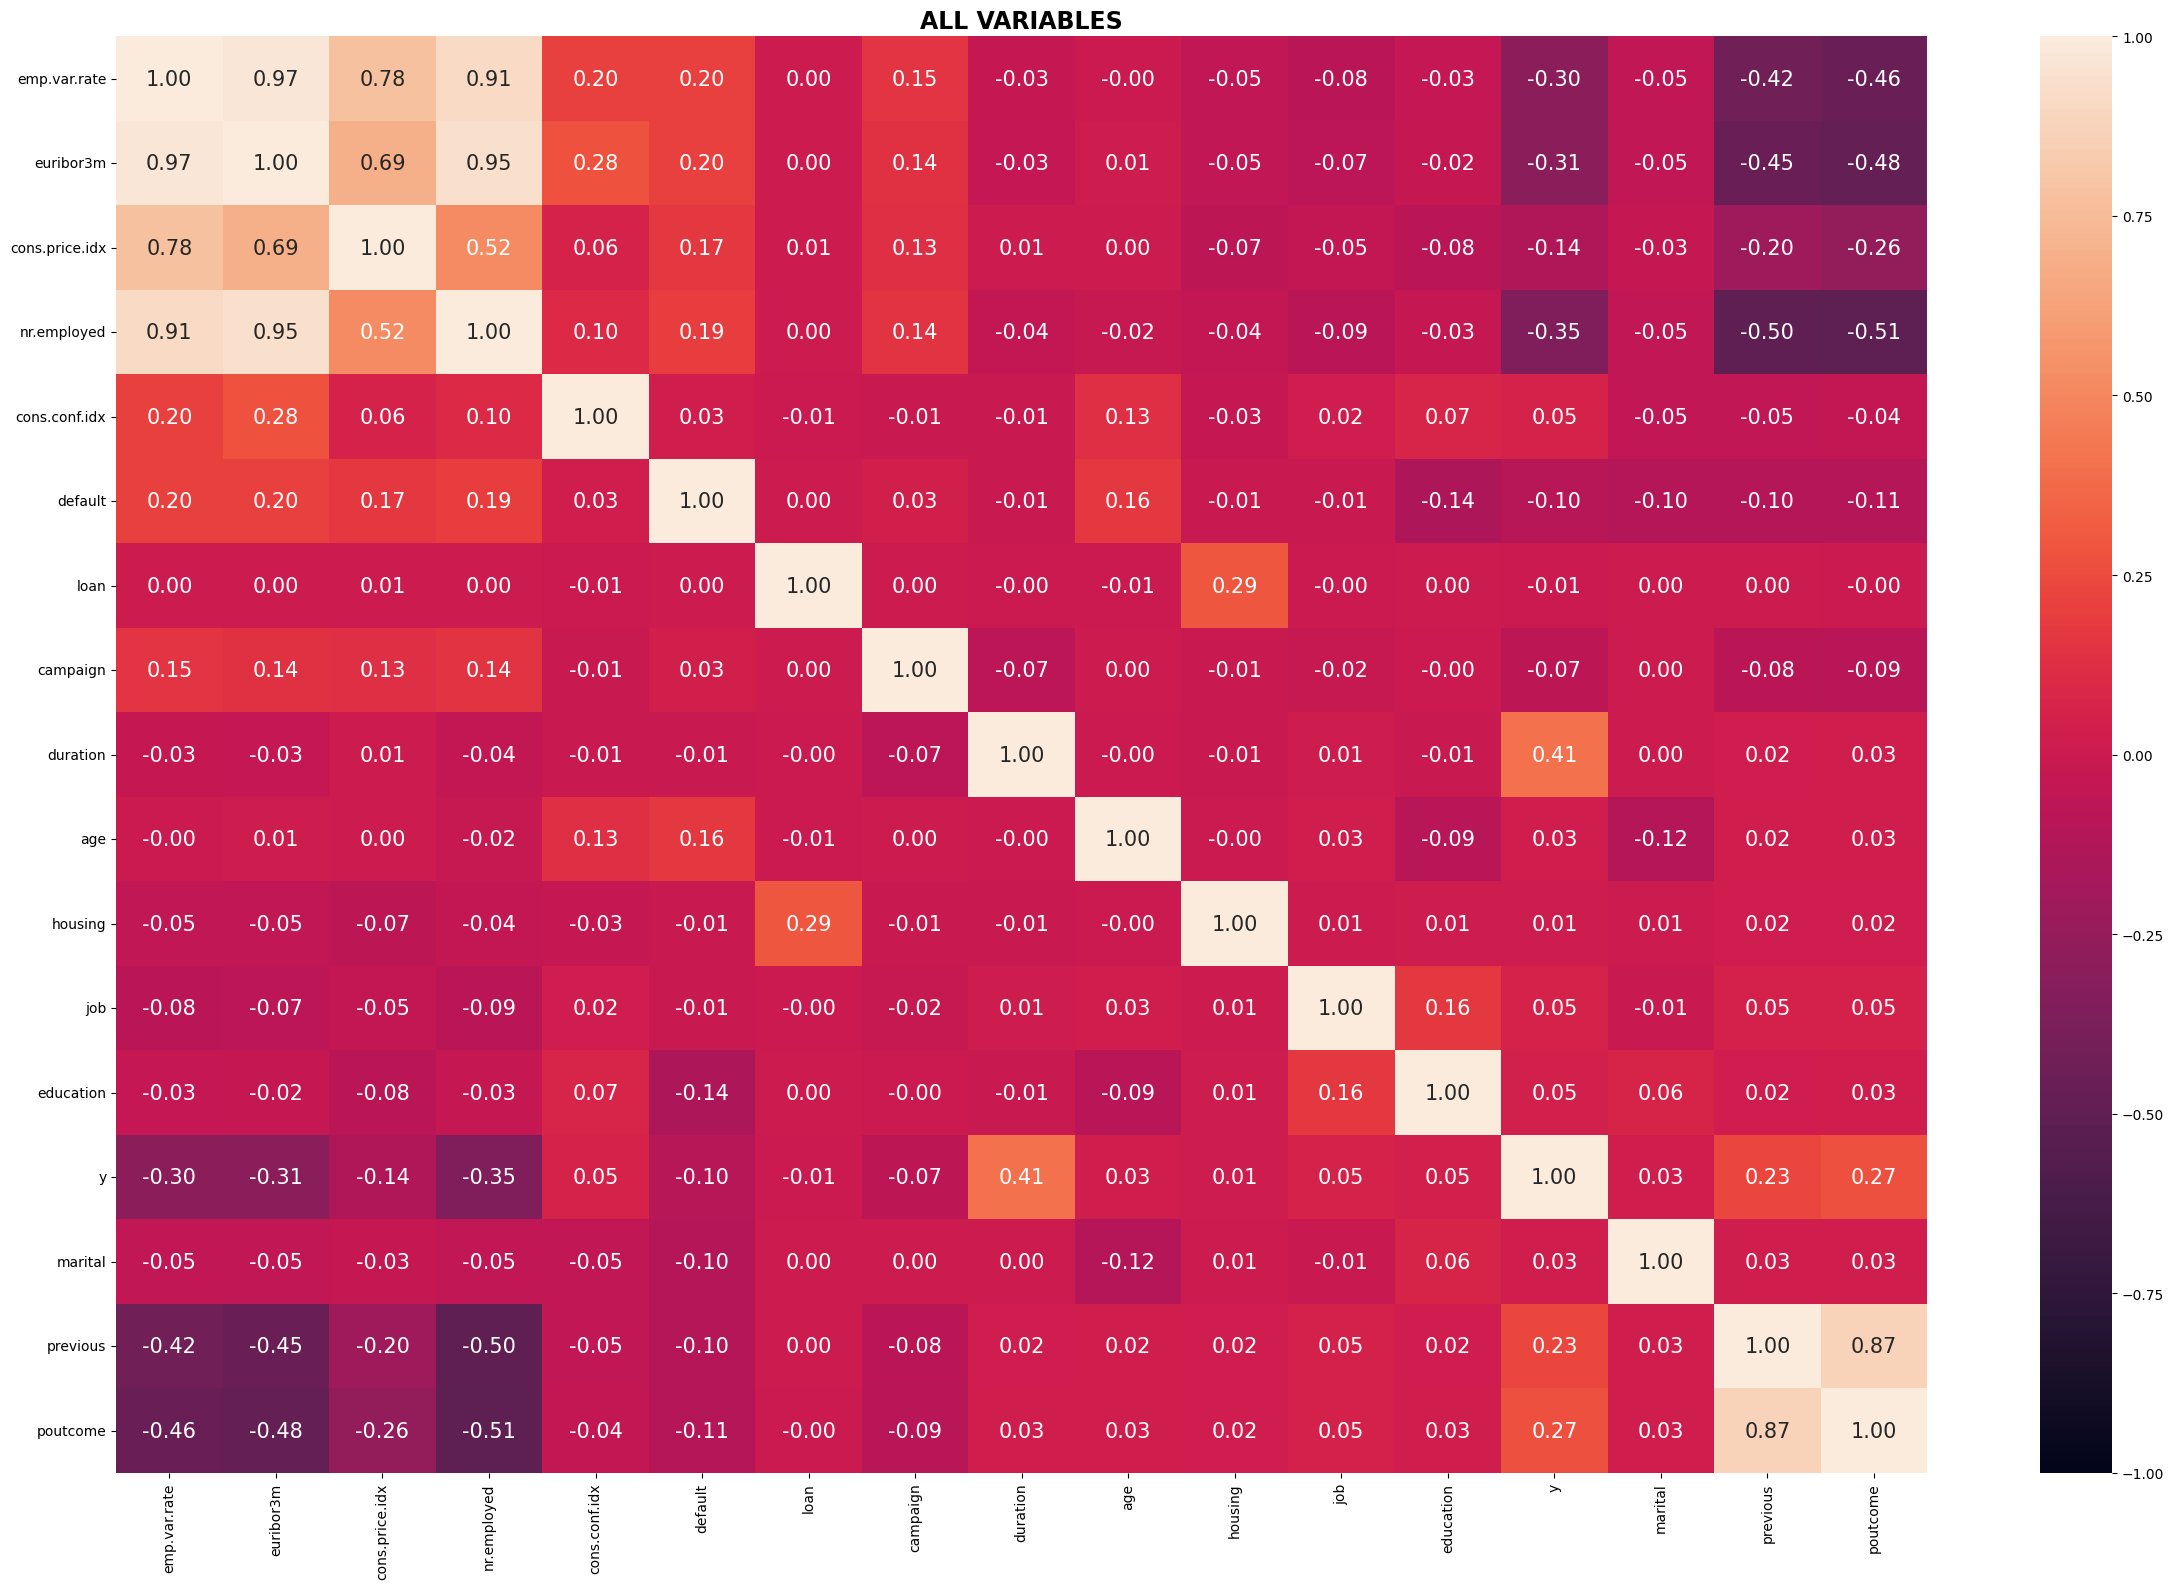

<Figure size 1200x800 with 0 Axes>

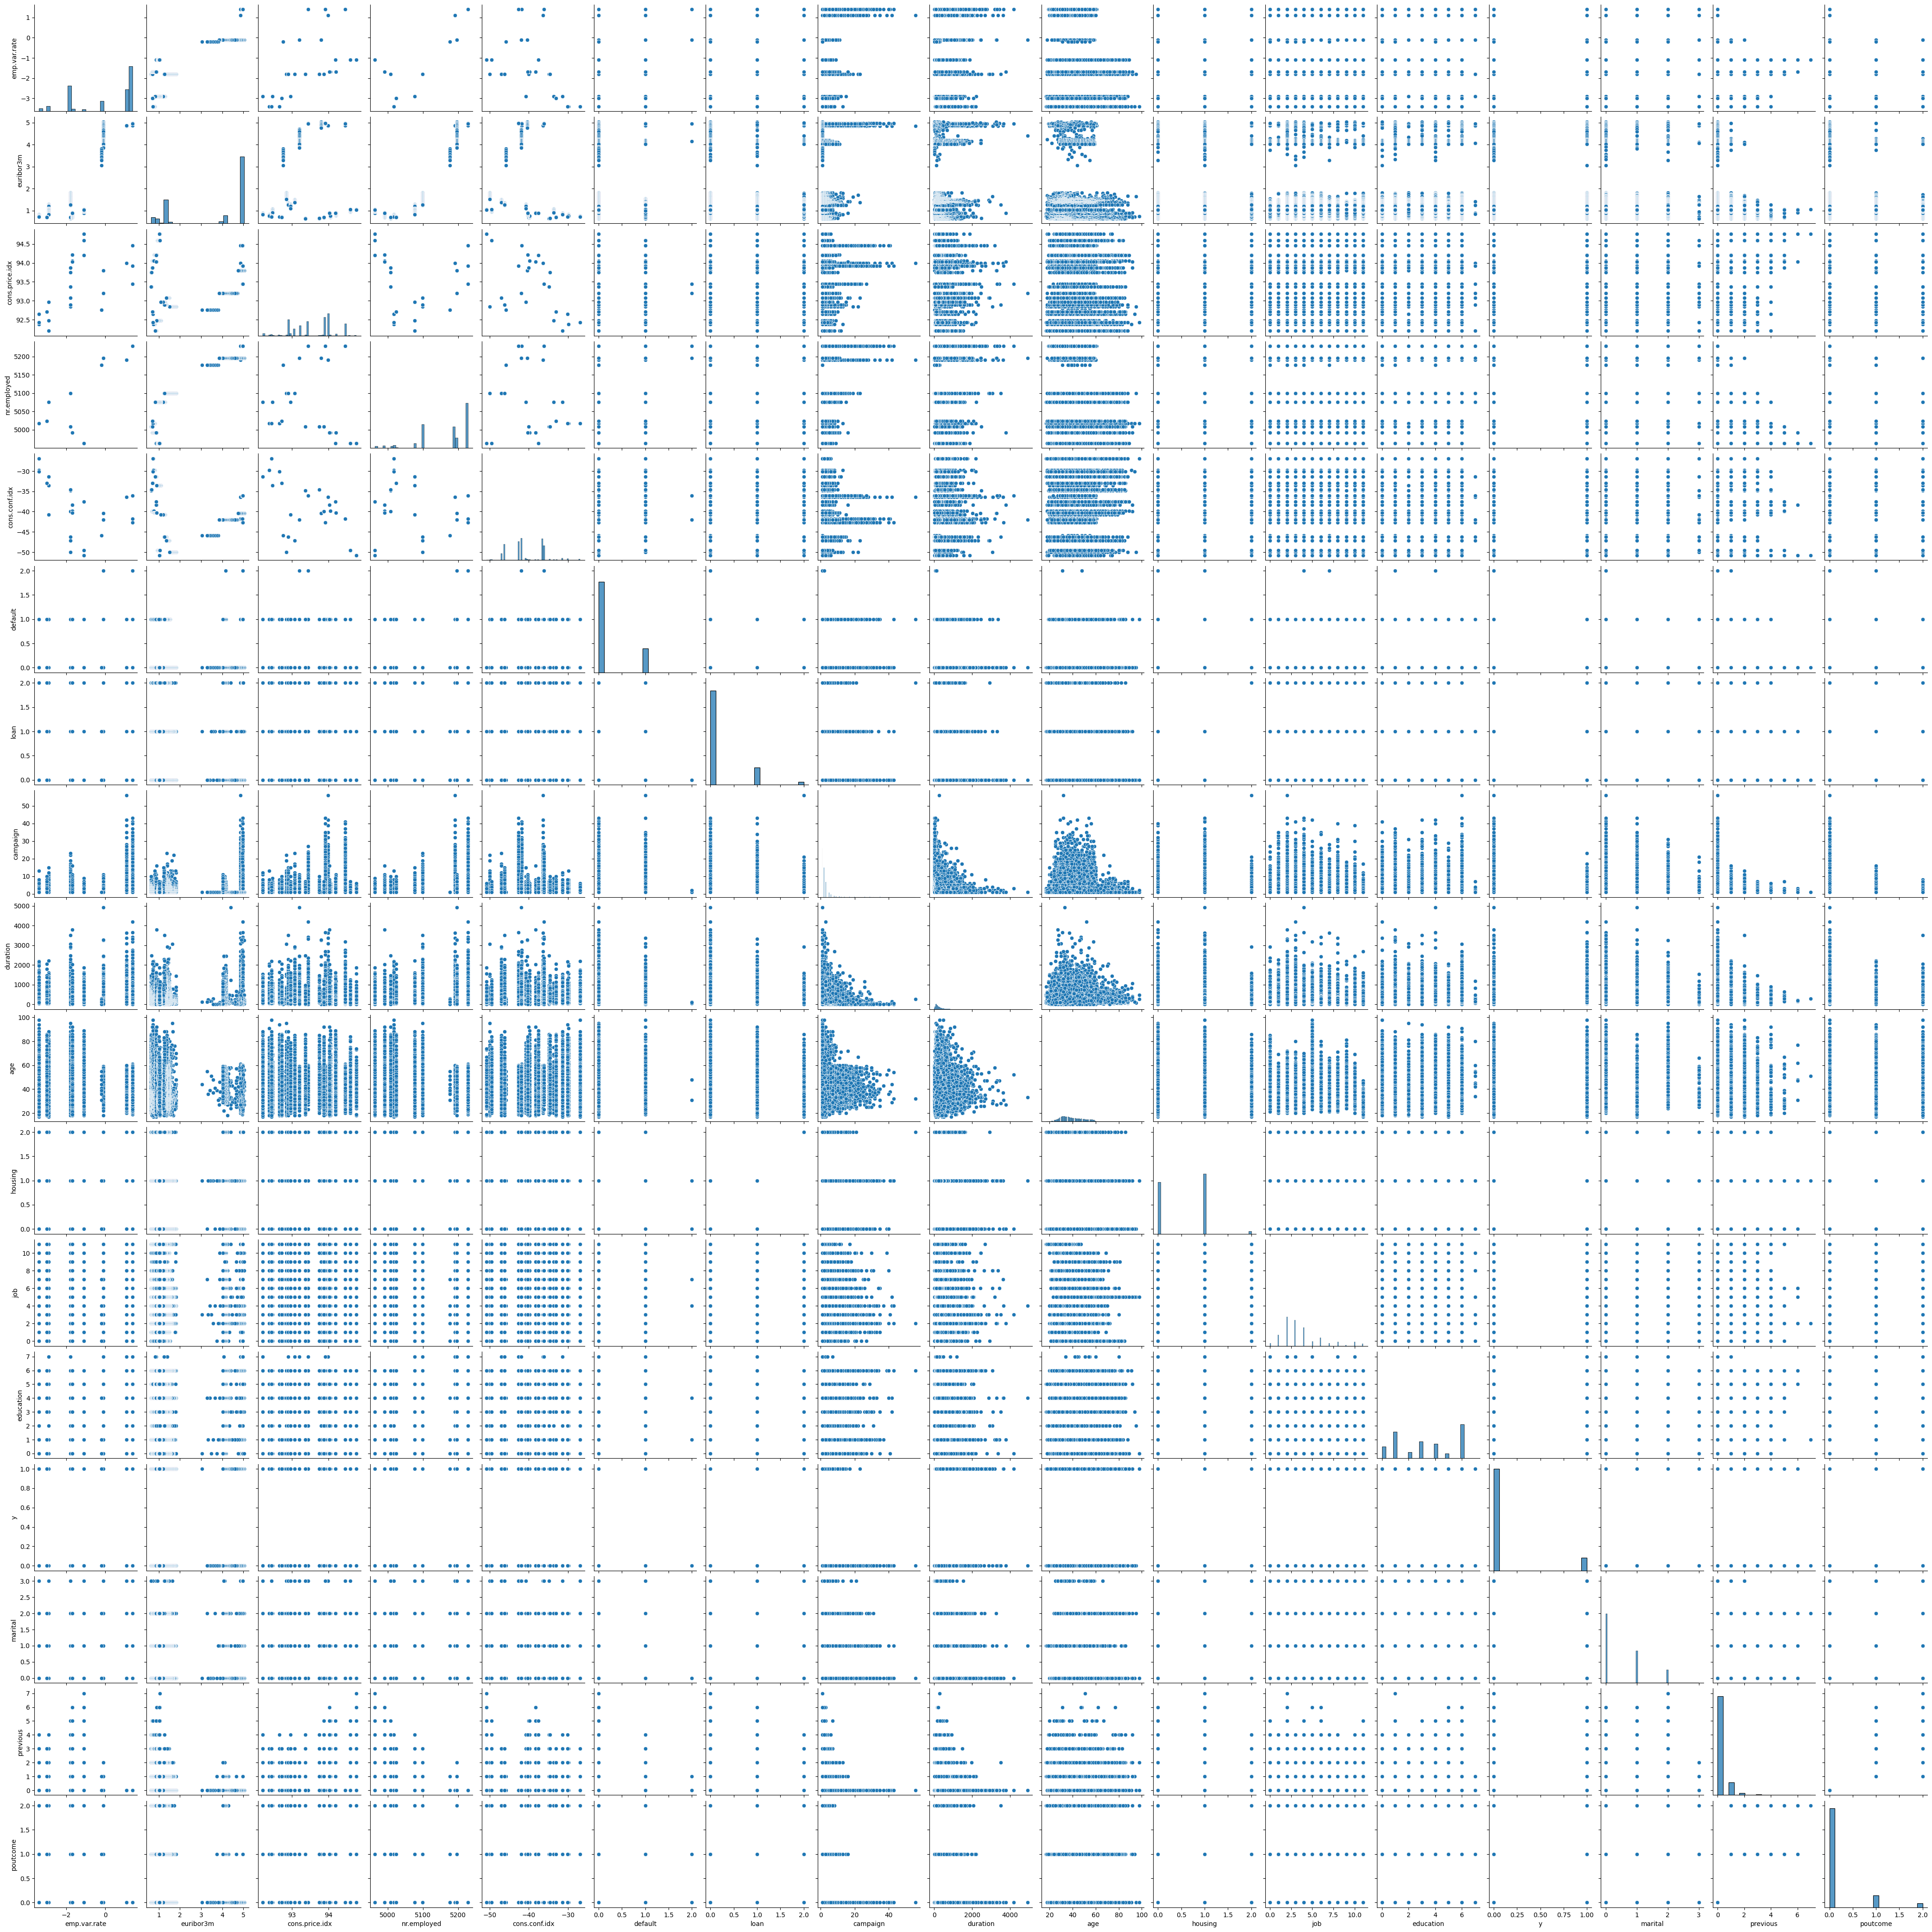

In [33]:
# -------------------------------
# STEP 5 - UNIVARIABLE ANALYSIS
# -------------------------------
print("STEP 5 - UNIVARIABLE ANALYSIS")

if not make_plots:
    print("UNIVARIABLE ANALYSIS is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S5 = df_S4.copy()

    
    print("\n 🏷️ CATEGORY VARIABLES")

    # Set plotting variables
    var_to_plot=category_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots
    fig, axes = plt.subplots(
        nrows = num_rows,
        ncols = num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
        
    # Flatten the axes array for easier access
    axes = axes.flatten()  

    # Loop through variables
    idx = 0
    for col in var_to_plot:
        # Count unique values
        unique_count = df_S5[col].nunique()
        
        # Limit the number of plotted categories if there are more than num_values_to_plot
        if unique_count > num_values_to_plot:
            order = df_S5[col].value_counts().head(num_values_to_plot).index
        else:
            order = df_S5[col].value_counts().index
        
        # Create countplot
        sns.countplot(
            ax = axes[idx],
            data = df_S5,
            x = col,
            hue = col,
            palette = my_palette,
            order = order,
            legend = False)
        axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
        
        # Add text box if truncated
        if unique_count > num_values_to_plot:
            msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
            axes[idx].text(
                x = 0.5,
                y = 0.9,
                s = msg,
                transform=axes[idx].transAxes,
                fontsize=my_font_size,
                color='red',
                ha='center',
                va='top',
                bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
        
        idx += 1

    # Turn off unused axes if there are any
    for j in range(idx, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    print("\n 🔢 NUMERIC VARIABLES")

    # Set plotting variables
    var_to_plot=numeric_var # Variable type for this plot
    num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

    # Create subplots with custom height ratios
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols =  num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 0.5] * num_rows})

    # Loop through variables
    var_idx = 0
    for row in range(num_rows):
        for col in range(num_cols):
            if var_idx >= len(var_to_plot):
                # Hide unused subplots
                axes[row * 2, col].set_visible(False)
                axes[row * 2 + 1, col].set_visible(False)
                continue

            # Histogram (top)
            sns.histplot(
                ax = axes[row * 2, col],
                data = df_S5,
                x = var_to_plot[var_idx],
                bins = num_bins)
            axes[row * 2, col].set_xlabel("")

            # Boxplot (bottom)
            sns.boxplot(
                ax=axes[row * 2 + 1, col],
                data=df_S5,
                x = var_to_plot[var_idx])
            
            var_idx += 1

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET
# -------------------------------
print("STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET")

if not make_plots:
    print("MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S6 = df_S4.copy()

    print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target")

    if y_var not in numeric_var:
        print("   This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:
        # Set plotting variables
        var_to_plot=numeric_var # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots with custom height ratios
        fig, axes = plt.subplots(
            nrows = num_rows * 2,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
            gridspec_kw={'height_ratios': [4, 1] * num_rows})

        # Loop through variables
        var_idx = 0
        for row in range(num_rows):
            for col in range(num_cols):
                if var_idx >= len(var_to_plot):
                    # Hide unused subplots
                    axes[row * 2, col].set_visible(False)
                    axes[row * 2 + 1, col].set_visible(False)
                    continue

                # Regplot (top)
                sns.regplot(
                    ax = axes[row * 2, col],
                    data = df_S6,
                    x = var_to_plot[var_idx],
                    y = y_var,
                    scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                    line_kws = {'color': 'red'})

                # Boxplot (bottom)
                sns.heatmap(
                    ax = axes[row * 2 + 1, col],
                    data = df_S6[[var_to_plot[var_idx], y_var]].corr(),
                    annot = True,
                    fmt = ".2f",
                    cbar = False)

                var_idx += 1

        # Adjust layout
        plt.tight_layout()
        plt.show()
    
    print("\n 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target")

    if y_var not in numeric_var:
        print("   This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:
        # Set plotting variables
        var_to_plot=category_var # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows))

        # flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:

            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create barplot
            sns.barplot(
                ax=axes[idx],
                data = df_S6,
                x = col,
                y = y_var,
                hue = cat_var_comb,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=10)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize = my_font_size,
                    color = 'red',
                    ha = 'center',
                    va = 'top',
                    bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

    print("\n 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target")

    if y_var not in category_var:
        print("   This type of plot is non applicable for this case, because the target variable is NUMERIC")
    else:
        # Set plotting variables
        hue_order = sorted(df_S6[y_var].dropna().unique().tolist()) # Determine hue order dynamically
        var_to_plot=category_var # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
            
        # Flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:
            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create countplot
            sns.countplot(
                ax = axes[idx],
                data = df_S6,
                x = col,
                hue = y_var,
                hue_order = hue_order,
                palette = my_palette,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize=my_font_size,
                    color='red',
                    ha='center',
                    va='top',
                    bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 7 - MULTIVARIANT ANALYSIS - ALL VS ALL
# -------------------------------
print("STEP 7 - MULTIVARIANT ANALYSIS - ALL VS ALL")

if not make_plots:
    print("MULTIVARIANT ANALYSIS - ALL VS ALL is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S7 = df_S4.copy()

    print("\n 🔢 NUMERIC VS 🔢 NUMERIC")

    var_to_plot=numeric_var # Variable type for this plot
    num_rows = len(var_to_plot) - 1 # Number of rows (one less than number of variables)

    # Create subplots with two stacked plots (regplot + heatmap) per variable pair
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = len(var_to_plot) - 1,
        figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 1] * num_rows})

    # Flatten axes for easy handling
    axes = np.array(axes)

    # Track subplot usage
    for row in range(num_rows):
        n_cols = len(var_to_plot) - row - 1 # Decreasing number of columns each row
        for col in range(n_cols):

            # Top: regplot
            sns.regplot(
                ax = axes[row * 2, col],
                data = df_S7,
                x = var_to_plot[row + col + 1],
                y = var_to_plot[row],
                scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                line_kws = {'color': 'red'})
            axes[row * 2, col].set_xlabel(var_to_plot[row + col + 1],fontsize=20)

            # Show Y label only for first plot in row
            if col == 0:
                axes[row * 2, col].set_ylabel(var_to_plot[row],fontsize=my_font_size)
            else:
                axes[row * 2, col].set_ylabel("")

            # Bottom: heatmap (correlation)
            sns.heatmap(
                ax = axes[row * 2 + 1, col],
                data = df_S7[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
                annot = True,
                fmt = ".2f",
                cbar = False,
                annot_kws = {"size": 20})

        # Hide unused subplots on the right for this row
        for col in range(n_cols, len(var_to_plot) - 1):
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

    print("\n 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes")

    # Encode categorical variables using the Series.factorize() method
    for col in category_var:
        codes, uniques = df_S7[col].factorize()
        df_S7[col] = codes  # replace column with integer codes

    # CATEGORY VARIABLES HEATMAP
    if len(category_var) > 1:
        corr_cat = df_S7[category_var].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY CATEGORY VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_cat,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough categorical variables for a correlation matrix.")

    # NUMERIC VARIABLES HEATMAP
    if len(numeric_var) > 1:
        corr_num = df_S7[numeric_var].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY NUMERIC VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_num,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough numeric variables for a correlation matrix.")

    # ALL VARIABLES HEATMAP
    corr_matrix = df_S7.corr()
    corr_order = corr_matrix.mean().sort_values(ascending=False).index
    corr_matrix = corr_matrix.loc[corr_order, corr_order]

    fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
    plt.title("ALL VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_matrix,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()

    # PAIRPLOT (sorted by correlation order)
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    sns.pairplot(data=df_S7[corr_order])
    plt.show()

In [7]:
# -------------------------------
# STEP 8) REMOVE NOISY ATTRIBUTES
# -------------------------------
print("STEP 8) REMOVE NOISY ATTRIBUTES")

# Copy of previous DataFrame
df_S8 = df_S4.copy()

# Detect highly correlated numeric features
corr_matrix = df_S8[numeric_var].corr().abs()  # Absolute values for correlation strength

# Create an empty set to store columns to drop
to_drop = set()

# Iterate through correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            # Drop one of the two correlated columns (keep the first, drop the second)
            if col_i not in to_drop:
                to_drop.add(col_i)

# Drop the detected "noisy" attributes
if to_drop:
    df_S8 = df_S8.drop(columns=list(to_drop), axis=1)
    print(f"- ⚠️ High correlation detected (> {corr_threshold}). The following attributes were dropped:")
    for col in to_drop:
        print(f"   • {col}")
else:
    print(f"- ✅ No attributes exceeded the correlation threshold of {corr_threshold}. Nothing was dropped.")

# Display summary information
print(f"- ℹ️ Previous df's columns: {len(df_S4.columns)}")
print(f"- ℹ️ Cleaned df's  columns: {len(df_S8.columns)}")
print(f"- ℹ️ Final DataFrame shape: {df_S8.shape}")

display(df_S8.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 9) CLEAN OUTLIERS
# -------------------------------
print("STEP 9) CLEAN OUTLIERS")

# Copy  of previous DataFrame
df_S9=df_S8.copy()

# Print info
display(df_S9.describe())

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_var:
    if col in df_S9.columns.to_list():
        cols.append(col)

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S9.index)

for col in cols:
    Q1 = df_S9[col].quantile(0.25)
    Q3 = df_S9[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S9[col] < lower).sum()
    n_high = (df_S9[col] > upper).sum()
    n_extreme_low = (df_S9[col] < extreme_lower).sum()
    n_extreme_high = (df_S9[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S9.index)) * 100
    pct_high = (n_high / len(df_S9.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S9.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S9.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_var:
    if col in df_S9.columns.to_list():
        cols.append(col)

if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")
elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None extreme lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None extreme upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")

print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S9)}")
display(df_S9.describe())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 10) MISSING VALUES
# -------------------------------
print("STEP 10) MISSING VALUES")

# Copy  of previous DataFrame
df_S10=df_S9.copy()

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S10[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S10.isnull().sum() / len(df_S10)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S10.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S10 = pd.merge(df_S10, medians, on=group_vars, how="left")

            # Fill missing values
            df_S10[col] = df_S10[col].fillna(df_S10[f"median_{col}"])

            # Drop helper column
            df_S10 = df_S10.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S10 = df_S10.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S10.isnull().sum()}")

print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

STEP 8) REMOVE NOISY ATTRIBUTES
- ⚠️ High correlation detected (> 0.9). The following attributes were dropped:
   • nr.employed
   • euribor3m
- ℹ️ Previous df's columns: 17
- ℹ️ Cleaned df's  columns: 15
- ℹ️ Final DataFrame shape: (41176, 15)


age        job  marital    education  default housing loan  duration  \
0   56  housemaid  married     basic.4y       no      no   no       261   
1   57   services  married  high.school  unknown      no   no       149   
2   37   services  married  high.school       no     yes   no       226   
3   40     admin.  married     basic.6y       no      no   no       151   
4   56   services  married  high.school       no      no  yes       307   

   campaign  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1         0  nonexistent           1.1          93.994   
1         1         0  nonexistent           1.1          93.994   
2         1         0  nonexistent           1.1          93.994   
3         1         0  nonexistent           1.1          93.994   
4         1         0  nonexistent           1.1          93.994   

   cons.conf.idx   y  
0          -36.4  no  
1          -36.4  no  
2          -36.4  no  
3          -36.4  no  
4          -36.4  no

--------------------------------------------------------------
--------------------------------------------------------------

STEP 9) CLEAN OUTLIERS


age      duration      campaign      previous  emp.var.rate  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879      0.173013      0.081922   
std       10.42068    259.305321      2.770318      0.494964      1.570883   
min       17.00000      0.000000      1.000000      0.000000     -3.400000   
25%       32.00000    102.000000      1.000000      0.000000     -1.800000   
50%       38.00000    180.000000      2.000000      0.000000      1.100000   
75%       47.00000    319.000000      3.000000      0.000000      1.400000   
max       98.00000   4918.000000     56.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx  
count    41176.000000   41176.000000  
mean        93.575720     -40.502863  
std          0.578839       4.627860  
min         92.201000     -50.800000  
25%         93.075000     -42.700000  
50%         93.749000     -41.800000  
75%         93.994000     -36.400000  
max         94.767000     -26.900000

age     duration    campaign    previous  \
lower_limit           9.500000  -223.500000    -2.00000     0.00000   
upper_limit          69.500000   644.500000     6.00000     0.00000   
n_outliers_lower      0.000000     0.000000     0.00000     0.00000   
n_outliers_upper    468.000000  2963.000000  2406.00000  5625.00000   
pct_outliers_lower    0.000000     0.000000     0.00000     0.00000   
pct_outliers_upper    1.136584     7.195939     5.84321    13.66087   

                    emp.var.rate  cons.price.idx  cons.conf.idx  
lower_limit                 -6.6         91.6965     -52.150000  
upper_limit                  6.2         95.3725     -26.950000  
n_outliers_lower             0.0          0.0000       0.000000  
n_outliers_upper             0.0          0.0000     446.000000  
pct_outliers_lower           0.0          0.0000       0.000000  
pct_outliers_upper           0.0          0.0000       1.083155

age     duration     campaign    previous  \
extreme_lower_limit        -13.000000  -549.000000    -5.000000     0.00000   
extreme_upper_limit         92.000000   970.000000     9.000000     0.00000   
n_extreme_outliers_lower     0.000000     0.000000     0.000000     0.00000   
n_extreme_outliers_upper     4.000000  1043.000000  1094.000000  5625.00000   
pct_extreme_outliers_lower   0.000000     0.000000     0.000000     0.00000   
pct_extreme_outliers_upper   0.009714     2.533029     2.656888    13.66087   

                            emp.var.rate  cons.price.idx  cons.conf.idx  
extreme_lower_limit                -11.4          90.318          -61.6  
extreme_upper_limit                 11.0          96.751          -17.5  
n_extreme_outliers_lower             0.0           0.000            0.0  
n_extreme_outliers_upper             0.0           0.000            0.0  
pct_extreme_outliers_lower           0.0           0.000            0.0  
pct_extreme_outliers_upper           0.0           0.000            0.0

- ATTRIBUTE age:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (0.01% <= 3.0%)


- ATTRIBUTE duration:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (2.53% <= 3.0%)


- ATTRIBUTE campaign:
 - ℹ️ None extreme lower outliers detected
 - ⚠️ REMOVED extreme upper outliers (2.66% <= 3.0%)


- ATTRIBUTE previous:
 - ℹ️ None extreme lower outliers detected
 - ✅ KEPT extreme upper outliers (13.66% > 3.0%)


- ATTRIBUTE emp.var.rate:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected


- ATTRIBUTE cons.price.idx:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected


- ATTRIBUTE cons.conf.idx:
 - ℹ️ None extreme lower outliers detected
 - ℹ️ None extreme upper outliers detected


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 41176
 - ℹ️ Cleaned df's  rows: 39059


age      duration      campaign      previous  emp.var.rate  \
count  39059.000000  39059.000000  39059.000000  39059.000000  39059.000000   
mean      40.024450    233.058501      2.227707      0.178397      0.051729   
std       10.436141    184.636592      1.623686      0.502463      1.577053   
min       17.000000      0.000000      1.000000      0.000000     -3.400000   
25%       32.000000    103.000000      1.000000      0.000000     -1.800000   
50%       38.000000    177.000000      2.000000      0.000000      1.100000   
75%       47.000000    305.000000      3.000000      0.000000      1.400000   
max       92.000000    970.000000      9.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx  
count    39059.000000   39059.000000  
mean        93.565781     -40.501155  
std          0.579692       4.658933  
min         92.201000     -50.800000  
25%         93.075000     -42.700000  
50%         93.444000     -41.800000  
75%         93.994000     -36.400000  
max         94.767000     -26.900000

--------------------------------------------------------------
--------------------------------------------------------------

STEP 10) MISSING VALUES
- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------



In [ ]:
# -------------------------------
# STEP 11) SPLIT
# -------------------------------
print("STEP 11) SPLIT")

# Copy  of previous DataFrame
df_SPLIT = df_S10.copy()

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 12) SCALLING
# -------------------------------
print("STEP 12) SCALLING")

# Copy of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# SCALER TYPE ROW
# -------------------------------
scaler_type_drop_down_cells = [widgets.Label(value="Scaler:", layout=widgets.Layout(width=cell_width, height=cell_height))]
scaler_type = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_type_drop = widgets.Dropdown(
        options=["StandardScaler", "MinMaxScaler"],
        value="StandardScaler",
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'})
    else:
        scaler_type_drop = widgets.Label(
        value="-",
        layout=widgets.Layout(width=cell_width, height=cell_height))

    scaler_type_drop_down_cells.append(scaler_type_drop)
    scaler_type.append(scaler_type_drop)
scaler_type_row = widgets.HBox(scaler_type_drop_down_cells)

# -------------------------------
# ENCODER TYPE ROW
# -------------------------------
encoder_type_drop_down_cells = [widgets.Label(value="Encoder:", layout=widgets.Layout(width=cell_width, height=cell_height))]
encoder_type = []
for i in range(len(columns)):
    if columns[i] in category_var:
        encoder_type_drop = widgets.Dropdown(
        options=["LabelEncoder", "OneHotEncoder"],
        value="LabelEncoder",
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'})
    else:
        encoder_type_drop = widgets.Label(
        value="-",
        layout=widgets.Layout(width=cell_width, height=cell_height))

    encoder_type_drop_down_cells.append(encoder_type_drop)
    encoder_type.append(encoder_type_drop)
encoder_type_row = widgets.HBox(encoder_type_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, scaler_type_row, encoder_type_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

In [ ]:
# Validate box inputs
for i in range(len(scaler_type)):
    if  scaler_type[i].value not in ["StandardScaler", "MinMaxScaler"] and columns[i] in numeric_var:
        raise ValueError("- ❌ Missing Scaler selection in column " + columns[i])
print("- ✅ Scalers selections validated successfully")

# Instance scaler for each category attribute
scaler_dic = {}
for i in range(len(scaler_type)):
    if scaler_type[i].value == "StandardScaler" and columns[i] in numeric_var:
        scaler = StandardScaler()
        scaler_dic[columns[i]] = scaler
    elif scaler_type[i].value == "MinMaxScaler" and columns[i] in numeric_var:
        scaler = MinMaxScaler()
        scaler_dic[columns[i]] = scaler
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]]) # Scaler expects 2D input
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        if scaler_type[i].value == "StandardScaler":
            new_col_name = columns[i] +"_SS"
        elif scaler_type[i].value == "MinMaxScaler":
            new_col_name = columns[i] +"_MMS"
        else:
            new_col_name = columns[i]
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i] + " - " + scaler_type[i].value)

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        if scaler_type[i].value == "StandardScaler":
            scaled_cols.append(columns[i] + "_SS")
        elif scaler_type[i].value == "MinMaxScaler":
            scaled_cols.append(columns[i] + "_MMS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 13) ENCODING
# -------------------------------
print("STEP 13) ENCODING")

# Copy  of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Validate box inputs
for i in range(len(encoder_type)):
    if  encoder_type[i].value not in ["LabelEncoder", "OneHotEncoder"] and columns[i] in category_var:
        raise ValueError("- ❌ Missing Encoder selection in column " + columns[i])
print("- ✅ Encoders selections validated successfully")

# Instance encoder for each category attribute
enconder_dic = {}
for i in range(len(encoder_type)):
    if encoder_type[i].value == "LabelEncoder" and columns[i] in category_var:
        encoder = LabelEncoder()
        enconder_dic[columns[i]] = encoder
    elif encoder_type[i].value == "OneHotEncoder" and columns[i] in category_var:
        encoder = OneHotEncoder(sparse_output=False)
        enconder_dic[columns[i]] = encoder
print("- ✅ All Encoders have been instanced successfully")

# Train encoder with ONLY train data
for i in range(len(columns)):
    if columns[i] in category_var:
        if encoder_type[i].value == "LabelEncoder":
            enconder_dic[columns[i]].fit(X_train_en[columns[i]]) # LabelEncoder works with 1D input
        elif encoder_type[i].value == "OneHotEncoder":
            enconder_dic[columns[i]].fit(X_train_en[[columns[i]]]) # OneHotEncoder expects 2D input
print("- ✅ All Encoders have been trained successfully")

# Apply encoder to BOTH train + test data
for i in range(len(encoder_type)):
    if encoder_type[i].value == "LabelEncoder" and columns[i] in category_var:
        X_train_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_train_en[columns[i]])
        X_test_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_test_en[columns[i]])
        print("- ✅ Train and Test data have been enconded for: " + columns[i] + " - LabelEncoder()")
    elif encoder_type[i].value == "OneHotEncoder" and columns[i] in category_var:
        # Transform both sets (2D)
        X_train_ohe = enconder_dic[columns[i]].transform(X_train_en[[columns[i]]])
        X_test_ohe = enconder_dic[columns[i]].transform(X_test_en[[columns[i]]])
        # Add "_OHE" suffix to new column names
        new_columns = [name + "_OHE" for name in enconder_dic[columns[i]].get_feature_names_out([columns[i]])]
        # Add "_OHE" suffix to new column names
        new_columns = []
        for j in range(len(enconder_dic[columns[i]].get_feature_names_out([columns[i]]))):
            name_with_suffix = enconder_dic[columns[i]].get_feature_names_out([columns[i]])[j] + "_OHE"
            new_columns.append(name_with_suffix)
        # Convert to DataFrame
        X_train_ohe = pd.DataFrame(X_train_ohe, index=X_train_en.index, columns=new_columns)
        X_test_ohe = pd.DataFrame(X_test_ohe, index=X_test_en.index, columns=new_columns)

        # Concatenate the encoded columns back to the dataset
        X_train_en = pd.concat([X_train_en, X_train_ohe], axis=1)
        X_test_en = pd.concat([X_test_en, X_test_ohe], axis=1)
        print("- ✅ Train and Test data have been enconded for: " + columns[i] + " - OneHotEncoder()")

# Keep only encoded columms
encoded_cols = []
for i in range(len(columns)):
    if columns[i] in category_var:
        if encoder_type[i].value == "LabelEncoder":
            encoded_cols.append(columns[i] + "_LE")
        elif encoder_type[i].value == "OneHotEncoder":
            for j in range(len(enconder_dic[columns[i]].get_feature_names_out([columns[i]]))):
                encoded_cols.append(enconder_dic[columns[i]].get_feature_names_out([columns[i]])[j] + "_OHE")
X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

X_train_en.head()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 14) FEATURE SELECTION
# -------------------------------
print("STEP 14) FEATURE SELECTION")

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_assembled.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_assembled, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_assembled = pd.DataFrame(selection_model.transform(X_train_assembled), columns = X_train_assembled.columns.values[keeping_mask])
X_test_assembled = pd.DataFrame(selection_model.transform(X_test_assembled), columns = X_test_assembled.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# -------------------------------
# STEP 15) SAVE PROCESSED DATA
# -------------------------------
print("STEP 15) SAVE PROCESSED DATA")

X_train_final = X_train_assembled
X_test_final = X_test_assembled
y_train_final = y_train
y_test_final = y_test

output_path_X_train = output_path + "X_train_final.csv"
output_path_X_test = output_path + "X_test_final.csv"
output_path_y_train = output_path + "y_train_final.csv"
output_path_y_test = output_path + "y_test_final.csv"

X_train_final.to_csv(output_path_X_train, index=False)
X_test_final.to_csv(output_path_X_test, index=False)
y_train_final.to_csv(output_path_y_train, index=False)
y_test_final.to_csv(output_path_y_test, index=False)

print("- ✅ File saved at:", output_path)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


NameError: name 'scaler_type' is not defined

In [ ]:
# =====================================
# ALGORITHM SELECTION
# =====================================

# Type of target variable
if y.name in category_var:
    target_var_type = "CATEGORY"
    available_models = [
        "LogisticRegression()",
        "DecisionTreeClassifier()",
        "RandomForestClassifier()",
        "AdaBoostClassifier()",
        "GradientBoostingClassifier()",
        "XGBClassifier()",
        "LGBMClassifier()"
    ]
elif y.name in numeric_var:
    target_var_type = "NUMERIC"
    available_models = [
        "LinearRegression()",
        "Ridge()",
        "Lasso()",
        "DecisionTreeRegressor()",
        "RandomForestRegressor()",
        "AdaBoostRegressor()",
        "GradientBoostingRegressor()",
        "XGBRegressor()",
        "LGBMRegressor()"
    ]

# ---- Configuration ----
cell_h   = '30px'
label_w  = '220px'
select_w = '160px'
table_w  = '450px'
label_layout  = widgets.Layout(width=label_w,  height=cell_h, align_self='center')
select_layout = widgets.Layout(width=select_w, height=cell_h)

# HEADER
children = [
    widgets.Label(value=f"Target var.: {y.name}", layout=label_layout),
    widgets.Label(value=f"Type of var: {target_var_type}", layout=select_layout)
]

# DYNAMIC ROWS
dropdown_widgets = {}  # store references to each model’s widget

for model_name in available_models:
    dropdown = widgets.Dropdown(
        value=True,
        options=[True, False],
        layout=select_layout,
        style={'description_width': '0px'}
    )
    children += [
        widgets.Label(
            value=model_name,
            layout=label_layout),
        dropdown
    ]
    dropdown_widgets[model_name] = dropdown  # store widget reference

# TABLE LAYOUT
table = widgets.GridBox(
    children=children,
    layout=widgets.Layout(
        grid_template_columns=f'{label_w} {select_w}',
        grid_auto_rows=cell_h,
        align_items='center',
        width=table_w,
        overflow_x='auto',
        border='1px solid #ccc',
        padding='6px'
    )
)
# Retrieve selections
selected_models = {name: w.value for name, w in dropdown_widgets.items()}

display(table)


In [ ]:
# Average parameter proposal (Returns both the suggested average and (optionally) the positive label)
def set_average_proposal(y: pd.Series):
    if y.nunique() == 2:
        class_freq = y.value_counts()
        pos_label = class_freq.index[-1]  # usually the minority class
        return "binary", pos_label, "f1"

    else:
        class_freq = y.value_counts(normalize=True)
        imbalance_ratio = class_freq.max() / class_freq.min()
        imbalance_threshold_macro = 1.5
        imbalance_threshold_micro = 1.2  # stricter balance criterion

        # Highly balanced multiclass → micro
        if imbalance_ratio <= imbalance_threshold_micro:
            return "micro", None, "f1_micro"

        # Moderately balanced multiclass → macro
        elif imbalance_ratio <= imbalance_threshold_macro:
            return "macro", None, "f1_macro"

        # Imbalanced multiclass → weighted
        else:
            return "weighted", None, "f1_weighted"

# Copy  of previous DataFrame
X_train_model = X_train_final.copy()
X_test_model = X_test_final.copy()
y_train_model = y_train.copy()
y_test_model = y_test.copy()


if selected_models["LogisticRegression()"]:
    #--------------------------
    # PROPOSED PARAMETERS
    #--------------------------
    proposed_average, proposed_pos_label, proposed_scoring_strategy = set_average_proposal(y_train_model)

    #--------------------------
    # DEFAULT MODEL
    #--------------------------
    # Instance model
    default_model = LogisticRegression(random_state = random_seed)
    # Train model with ONLY train data (y_train must be included because this is SUPERVISED Machine Learning Model)
    default_model.fit(X_train_model, y_train_model)
    # Prediction
    y_train_default_pred = default_model.predict(X_train_model)
    y_test_default_pred = default_model.predict(X_test_model)
    
    #--------------------------
    # HYPERPARAMETER OPTIMIZER
    #--------------------------
    # Definimos los parámetros que queremos ajustar a mano
    hyperparams_grid = {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        "class_weight": ["balanced", None]
    }

    # Generate all combinations, then filter invalid ones
    valid_hyperparams = []
    for hyperparams in ParameterGrid(hyperparams_grid):
        solver = hyperparams["solver"]
        penalty = hyperparams["penalty"]

        if solver == "liblinear" and penalty not in ["l1", "l2"]:
            continue
        if solver in ["newton-cg", "lbfgs", "sag"] and penalty not in ["l2", None]:
            continue
        if solver == "saga" and penalty not in ["l1", "l2", "elasticnet", None]:
            continue

        #valid_hyperparams.append(hyperparams)
        # ✅ wrap values into lists
        valid_hyperparams.append({
            "penalty": [penalty],
            "C": [hyperparams["C"]],
            "solver": [solver],
            "class_weight": [hyperparams["class_weight"]],
        })

    # Inicializamos la cuadrícula
    grid = GridSearchCV(
            estimator=default_model,
            param_grid=valid_hyperparams,
            scoring = "accuracy",
            cv = 10)
    grid.fit(X_train_model, y_train_model)
    optimized_params = grid.best_params_

    #--------------------------
    # OPTIMIZED MODEL
    #--------------------------
    # Instance model
    optimized_model = LogisticRegression(
        penalty = optimized_params["penalty"],
        C = optimized_params["C"],
        solver = optimized_params["solver"],
        class_weight = optimized_params["class_weight"],
        random_state = random_seed)
    # Train model with ONLY train data (y_train must be included because this is SUPERVISED Machine Learning Model)
    optimized_model.fit(X_train_model, y_train_model)
    # Prediction
    y_train_optimized_pred = optimized_model.predict(X_train_model)
    y_test_optimized_pred = optimized_model.predict(X_test_model)

    # Metrics
    default_accuracy_train = accuracy_score(y_train_model, y_train_default_pred)
    default_accuracy_test = accuracy_score(y_test_model, y_test_default_pred)
    default_precision_train = precision_score(y_train_model, y_train_default_pred, average=proposed_average, pos_label=proposed_pos_label)
    default_precision_test = precision_score(y_test_model, y_test_default_pred, average=proposed_average, pos_label=proposed_pos_label)
    default_recall_train = recall_score(y_train_model, y_train_default_pred, average=proposed_average, pos_label=proposed_pos_label)
    default_recall_test = recall_score(y_test_model, y_test_default_pred, average=proposed_average, pos_label=proposed_pos_label)
    default_f1_score_train = f1_score(y_train_model, y_train_default_pred, average=proposed_average, pos_label=proposed_pos_label)
    default_f1_score_test = f1_score(y_test_model, y_test_default_pred, average=proposed_average, pos_label=proposed_pos_label)

    optimized_accuracy_train = accuracy_score(y_train_model, y_train_optimized_pred)
    optimized_accuracy_test = accuracy_score(y_test_model, y_test_optimized_pred)
    optimized_precision_train = precision_score(y_train_model, y_train_optimized_pred, average=proposed_average, pos_label=proposed_pos_label)
    optimized_precision_test = precision_score(y_test_model, y_test_optimized_pred, average=proposed_average, pos_label=proposed_pos_label)
    optimized_recall_train = recall_score(y_train_model, y_train_optimized_pred, average=proposed_average, pos_label=proposed_pos_label)
    optimized_recall_test = recall_score(y_test_model, y_test_optimized_pred, average=proposed_average, pos_label=proposed_pos_label)
    optimized_f1_score_train = f1_score(y_train_model, y_train_optimized_pred, average=proposed_average, pos_label=proposed_pos_label)
    optimized_f1_score_test = f1_score(y_test_model, y_test_optimized_pred, average=proposed_average, pos_label=proposed_pos_label)


    print("\n==================== ⚖️ LogisticRegression_model() ====================")

    print("\n🧩 DEFAULT MODEL")
    print("  TRAIN:")
    print(f"   ▫️ Accuracy:  {default_accuracy_train}")
    print(f"   ▫️ Precision ({proposed_average}):  {default_precision_train}")
    print(f"   ▫️ Recall ({proposed_average}):     {default_recall_train}")
    print(f"   ▫️ F1-score ({proposed_average}):   {default_f1_score_train}")
    print(f"  TEST:")
    print(f"   ▫️ Accuracy:  {default_accuracy_test}")
    print(f"   ▫️ Precision ({proposed_average}):  {default_precision_test}")
    print(f"   ▫️ Recall ({proposed_average}):     {default_recall_test}")
    print(f"   ▫️ F1-score ({proposed_average}):   {default_f1_score_test}")

    print("\n🚀 OPTIMIZED MODEL")
    print(f"  TRAIN:")
    print(f"   ▫️ Accuracy:  {optimized_accuracy_train}")
    print(f"   ▫️ Precision ({proposed_average}):  {optimized_precision_train}")
    print(f"   ▫️ Recall ({proposed_average}):     {optimized_recall_train}")
    print(f"   ▫️ F1-score ({proposed_average}):   {optimized_f1_score_train}")
    print(f"  TEST:")
    print(f"   ▫️ Accuracy:  {optimized_accuracy_test}")
    print(f"   ▫️ Precision ({proposed_average}):  {optimized_precision_test}")
    print(f"   ▫️ Recall ({proposed_average}):     {optimized_recall_test}")
    print(f"   ▫️ F1-score ({proposed_average}):   {optimized_f1_score_test}")